<a href="https://colab.research.google.com/github/DaniilRoman/github_innovation_graph_analysis/blob/main/github_inno_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
economies = pd.read_csv('/content/drive/MyDrive/economy_collaborators.csv')
economies = economies[economies.source != "EU"][economies.destination != "EU"]

devs = pd.read_csv('/content/drive/MyDrive/developers.csv')
devs = devs[devs.iso2_code != "EU"]

orgs = pd.read_csv('/content/drive/MyDrive/organizations.csv')
orgs = orgs[orgs.iso2_code != "EU"]

<ipython-input-10-86f5f7b3afca>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  economies = economies[economies.source != "EU"][economies.destination != "EU"]


In [ ]:
def plot_kmeans(kmeans_data, country_codes_data, x_data, y_data, title, x_label, y_label, clusters=4):
  kmeans = KMeans(n_clusters=clusters)
  kmeans.fit(kmeans_data)

  plt.figure(figsize=(8, 6))
  scatter = plt.scatter(x_data, y_data, c=kmeans.labels_, cmap='viridis')

  for i, txt in enumerate(country_codes_data):
      plt.annotate(txt, (x_data.iloc[i], y_data.iloc[i]), fontsize=12)

  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)

  plt.show()

def get_aggregated_values(filtered_data, country_column, weight_column="weight"):
  grouped_sources = filtered_data.groupby([country_column, "year", "quarter"], group_keys=False, as_index=False).sum(weight_column)
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]

  total_value_2020 = filtered_weight[filtered_weight['year'] == 2020][weight_column].sum()
  total_value_2023 = filtered_weight[filtered_weight['year'] == 2023][weight_column].sum()

  print(
    f"""Total values changed from {total_value_2020} in 2020 to {total_value_2023} in 2023 = {((total_value_2023-total_value_2020)/total_value_2020)*100}%
    """
  )

  aggregated_weights = filtered_weight.groupby(country_column, as_index=False).agg({weight_column: list})

  aggregated_weights["diff_value"] = aggregated_weights[weight_column].apply(lambda x: x[1] - x[0] if len(x) > 1 else x[0])
  aggregated_weights["diff_percent"] = aggregated_weights[weight_column].apply(lambda x: ((x[1] - x[0])/x[0])*100 if len(x) > 1 else 100)

  aggregated_weights["total_percent_2020"] = aggregated_weights[weight_column].apply(lambda x: (x[0]/total_value_2020)*100 if len(x) > 1 else 0)
  aggregated_weights["total_percent_2023"] = aggregated_weights[weight_column].apply(lambda x: (x[1]/total_value_2023)*100 if len(x) > 1 else (x[0]/total_value_2023)*100)

  aggregated_weights["total_percent_diff"] = aggregated_weights["total_percent_2023"] - aggregated_weights["total_percent_2020"]

  return aggregated_weights

# Common numbers per quarter

Text(0.5, 1.0, 'Contribution increase per quarter')

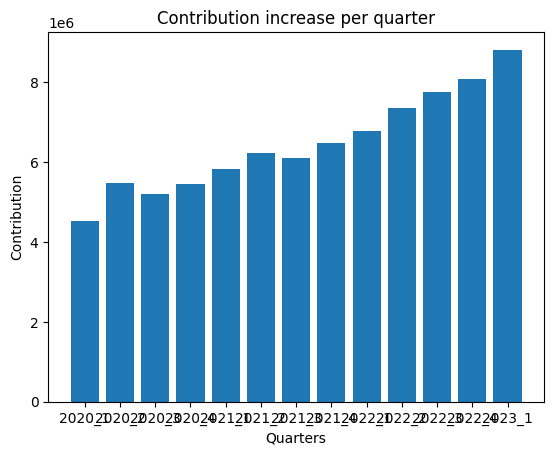

In [ ]:
grouped_sources = economies.groupby(["year", "quarter"], group_keys=False, as_index=False).sum("weight")

plt.bar(grouped_sources['year'].astype(str) + "_" + grouped_sources['quarter'].astype(str), grouped_sources["weight"])

plt.xlabel('Quarters')
plt.ylabel('Contribution')
plt.title('Contribution increase per quarter')

Text(0.5, 1.0, 'Developers increase per quarter')

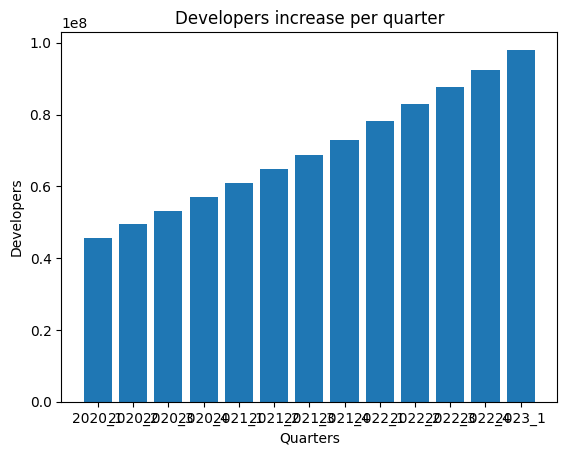

In [ ]:
grouped_sources = devs.groupby(["year", "quarter"], group_keys=False, as_index=False).sum("developers")

plt.bar(grouped_sources['year'].astype(str) + "_" + grouped_sources['quarter'].astype(str), grouped_sources["developers"])

plt.xlabel('Quarters')
plt.ylabel('Developers')
plt.title('Developers increase per quarter')

Text(0.5, 1.0, 'Organisations increase per quarter')

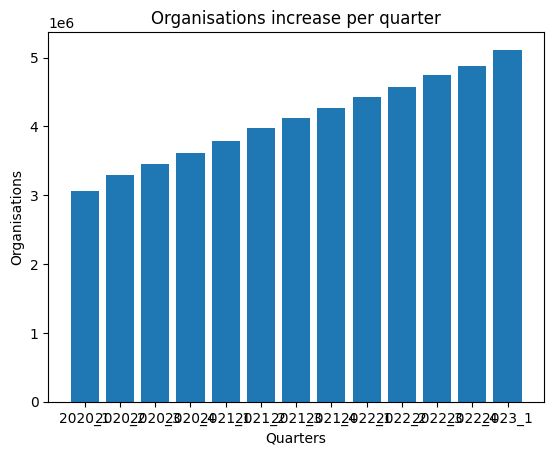

In [ ]:
grouped_sources = orgs.groupby(["year", "quarter"], group_keys=False, as_index=False).sum("organizations")

plt.bar(grouped_sources['year'].astype(str) + "_" + grouped_sources['quarter'].astype(str), grouped_sources["organizations"])

plt.xlabel('Quarters')
plt.ylabel('Organisations')
plt.title('Organisations increase per quarter')

# Organisations

In [ ]:
organisation_agregates = get_aggregated_values(
    filtered_data=orgs,
    country_column="iso2_code",
    weight_column="organizations"
)

Total values changed from 3060489 in 2020 to 5114334 in 2023 = 67.10839346261332%
    


<ipython-input-11-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]


In [ ]:
organisation_agregates.sort_values("diff_percent")

iso2_code     organizations  diff_value  diff_percent  total_percent_2020  \
35         CN  [377119, 380776]        3657      0.969720           12.322181   
47         DZ    [11218, 13859]        2641     23.542521            0.366543   
3          AL      [2615, 3234]         619     23.671128            0.085444   
175        VE      [7894, 9807]        1913     24.233595            0.257933   
26         BY      [6889, 8791]        1902     27.609232            0.225095   
..        ...               ...         ...           ...                 ...   
117        MW        [215, 557]         342    159.069767            0.007025   
174        UZ      [2027, 5597]        3570    176.122348            0.066231   
41         CY       [904, 3035]        2131    235.730088            0.029538   
105        ME        [289, 991]         702    242.906574            0.009443   
68         HK    [27115, 99470]       72355    266.844920            0.885970   

     total_percent_2023  total_percent_diff  
35             7.445270           -4.876911  
47             0.270983           -0.095559  
3              0.063234           -0.022210  
175            0.191755           -0.066177  
26             0.171889           -0.053205  
..                  ...                 ...  
117            0.010891            0.003866  
174            0.109438            0.043206  
41             0.059343            0.029805  
105            0.019377            0.009934  
68             1.944926            1.058956  

[182 rows x 7 columns]

## By percentage

Text(0.5, 1.0, 'Countries with the fastest organization numbers growth')

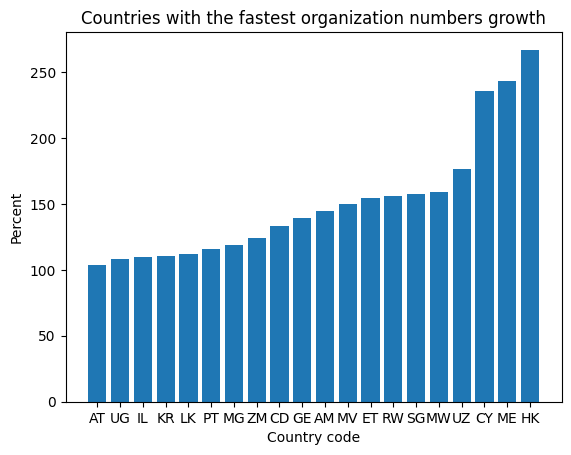

In [ ]:
to_plot_values = organisation_agregates.sort_values("diff_percent")[-20:]

plt.bar(to_plot_values["iso2_code"], to_plot_values["diff_percent"])

plt.xlabel('Country code')
plt.ylabel('Percent')
plt.title('Countries with the fastest organization numbers growth')

Text(0.5, 1.0, 'Countries with the fastest organization numbers growth')

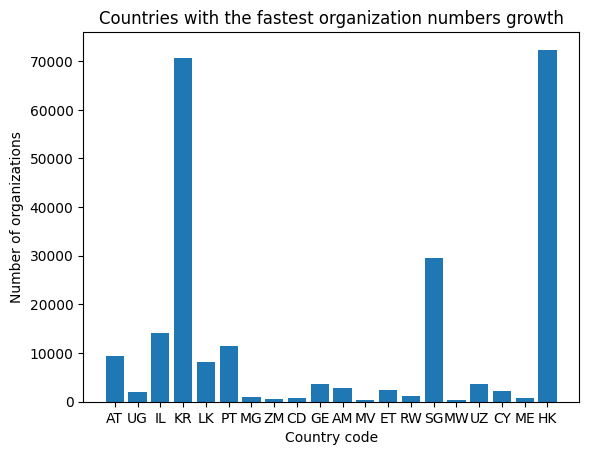

In [ ]:
to_plot_values = organisation_agregates.sort_values("diff_percent")[-20:]

plt.bar(to_plot_values["iso2_code"], to_plot_values["diff_value"])

plt.xlabel('Country code')
plt.ylabel('Number of organizations')
plt.title('Countries with the fastest organization numbers growth')

Text(0.5, 1.0, 'Countries with the fastest organization numbers growth comparison with global 100%')

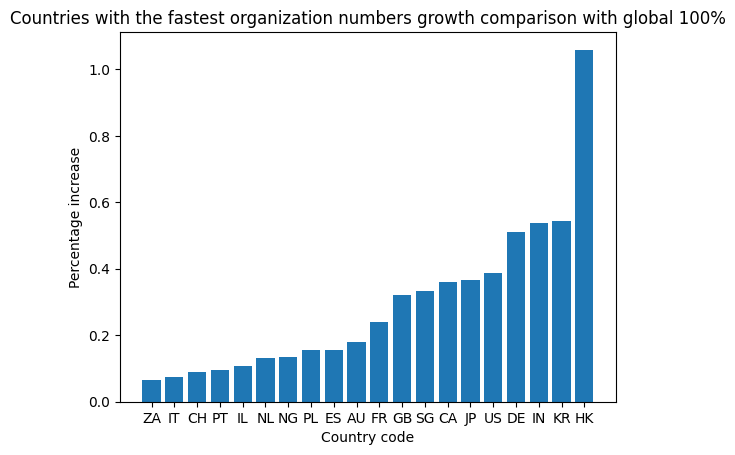

In [ ]:
to_plot_values = organisation_agregates.sort_values("total_percent_diff")[-20:]

plt.bar(to_plot_values["iso2_code"], to_plot_values["total_percent_diff"])

plt.xlabel('Country code')
plt.ylabel('Percentage increase')
plt.title('Countries with the fastest organization numbers growth comparison with global 100%')

Text(0.5, 1.0, 'Countries with the biggest organization numbers')

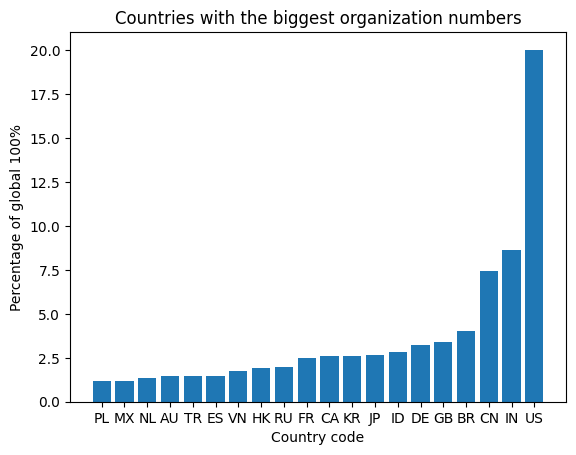

In [ ]:
to_plot_values = organisation_agregates.sort_values("total_percent_2023")[-20:]

plt.bar(to_plot_values["iso2_code"], to_plot_values["total_percent_2023"])

plt.xlabel('Country code')
plt.ylabel('Percentage of global 100%')
plt.title('Countries with the biggest organization numbers')

Text(0.5, 1.0, 'Countries with the most organisations decrease in percantage of global 100%')

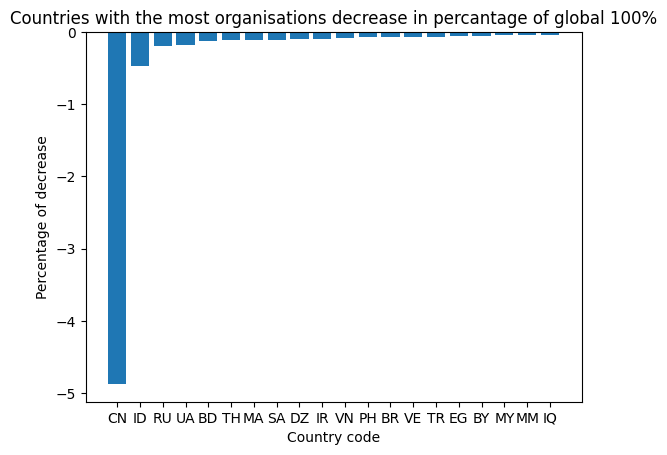

In [ ]:
to_plot_values = organisation_agregates.sort_values("total_percent_diff")[:20]

plt.bar(to_plot_values["iso2_code"], to_plot_values["total_percent_diff"])

plt.xlabel('Country code')
plt.ylabel('Percentage of decrease')
plt.title('Countries with the most organizations decrease in percantage of global 100%')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


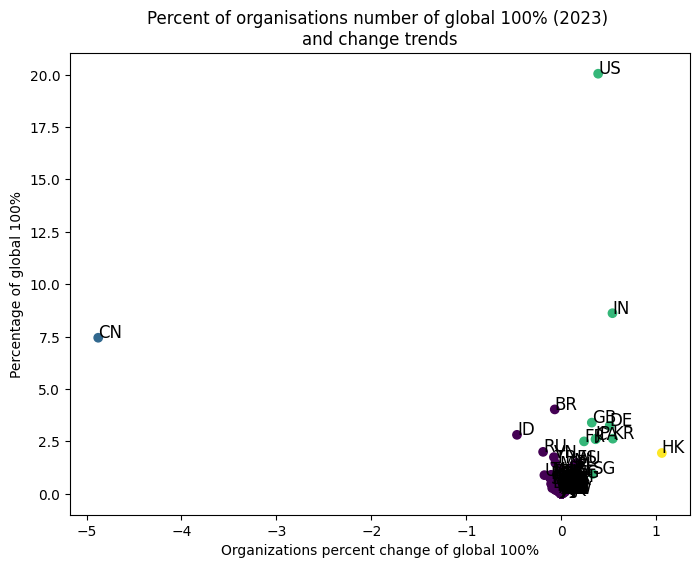

In [ ]:
copy_values = organisation_agregates

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['iso2_code'],
            x_data=copy_values['total_percent_diff'],
            y_data=copy_values['total_percent_2023'],
            title="Percent of organisations number of global 100% (2023) \nand change trends",
            x_label="Organizations percent change of global 100%",
            y_label="Percentage of global 100%")

<ipython-input-129-c2182c9751a6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  copy_values = organisation_agregates[organisation_agregates["total_percent_2023"] < 5][organisation_agregates["total_percent_diff"] < 0.7]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


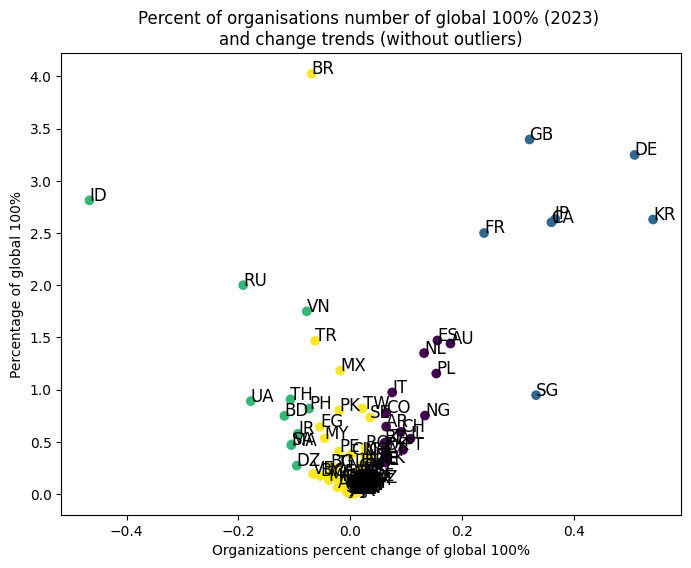

In [ ]:
copy_values = organisation_agregates[organisation_agregates["total_percent_2023"] < 5][organisation_agregates["total_percent_diff"] < 0.7]

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['iso2_code'],
            x_data=copy_values['total_percent_diff'],
            y_data=copy_values['total_percent_2023'],
            title="Percent of organisations number of global 100% (2023) \nand change trends (without outliers)",
            x_label="Organizations percent change of global 100%",
            y_label="Percentage of global 100%")

# Developers

In [ ]:
developers_aggregates = get_aggregated_values(
    filtered_data=devs,
    country_column="iso2_code",
    weight_column="developers"
)

Total values changed from 45476470 in 2020 to 98047120 in 2023 = 115.59967165437423%
    


<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]


Text(0.5, 1.0, 'Countries with the fastest developers number growth')

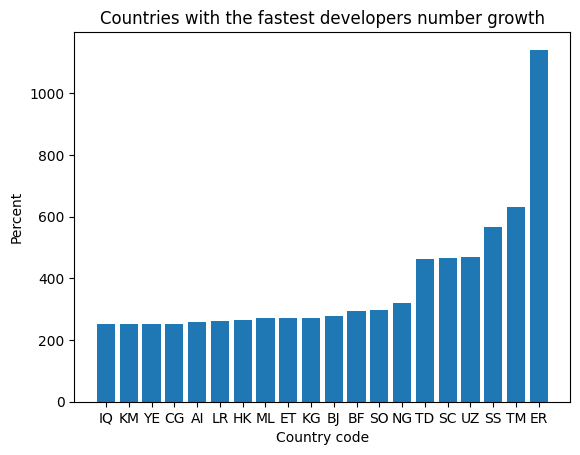

In [ ]:
to_plot_values = developers_aggregates.sort_values("diff_percent")[-20:]

plt.bar(to_plot_values["iso2_code"], to_plot_values["diff_percent"])

plt.xlabel('Country code')
plt.ylabel('Percent')
plt.title('Countries with the fastest developers number growth')

Text(0.5, 1.0, 'Actual numbers of countries with the fastest developers number growth')

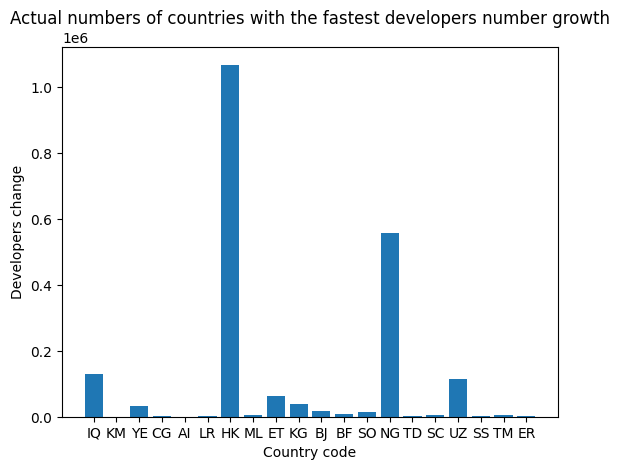

In [ ]:
to_plot_values = developers_aggregates.sort_values("diff_percent")[-20:]

plt.bar(to_plot_values["iso2_code"], to_plot_values["diff_value"])

plt.xlabel('Country code')
plt.ylabel('Developers change')
plt.title('Actual numbers of countries with the fastest developers number growth')

Text(0.5, 1.0, 'Countries with the most decrease of percent of developers comparing with global 100%')

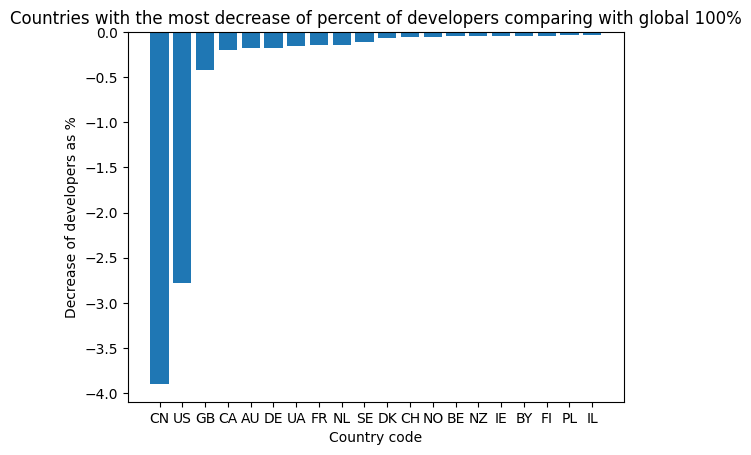

In [ ]:
to_plot_values = developers_aggregates.sort_values("total_percent_diff")[:20]

plt.bar(to_plot_values["iso2_code"], to_plot_values["total_percent_diff"])

plt.xlabel('Country code')
plt.ylabel('Decrease of developers as %')
plt.title('Countries with the most decrease of percent of developers comparing with global 100%')

Text(0.5, 1.0, 'Countries with the fastest developer numbers growth comparison with global 100%')

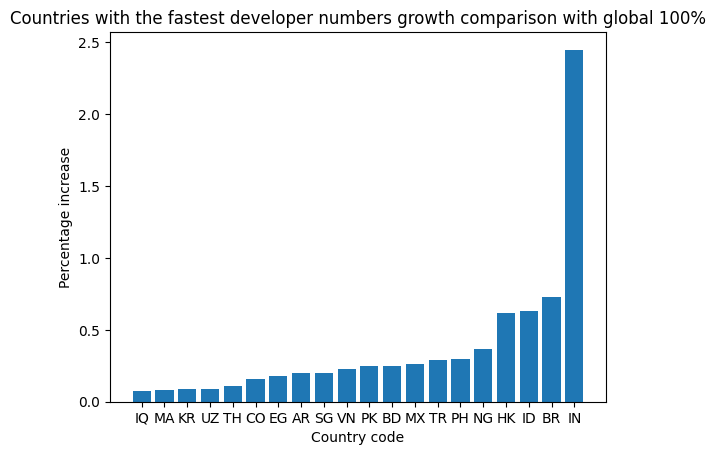

In [ ]:
to_plot_values = developers_aggregates.sort_values("total_percent_diff")[-20:]

plt.bar(to_plot_values["iso2_code"], to_plot_values["total_percent_diff"])

plt.xlabel('Country code')
plt.ylabel('Percentage increase')
plt.title('Countries with the fastest developer numbers growth comparison with global 100%')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


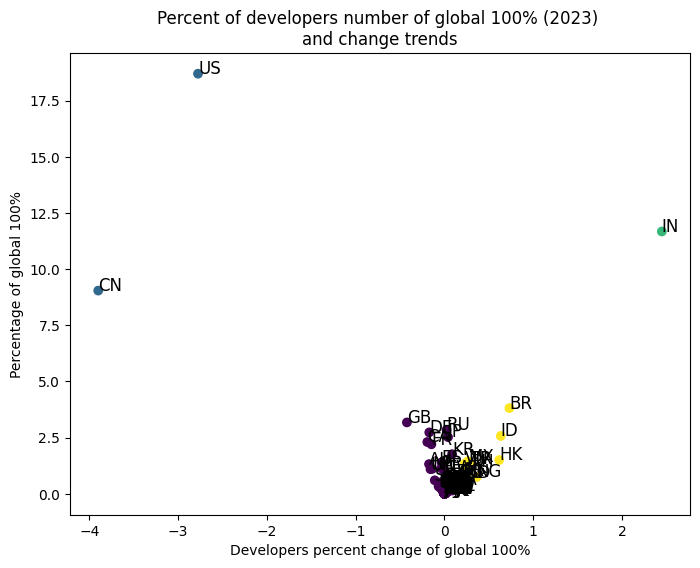

In [ ]:
copy_values = developers_aggregates

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['iso2_code'],
            x_data=copy_values['total_percent_diff'],
            y_data=copy_values['total_percent_2023'],
            title="Percent of developers number of global 100% (2023) \nand change trends",
            x_label="Developers percent change of global 100%",
            y_label="Percentage of global 100%")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


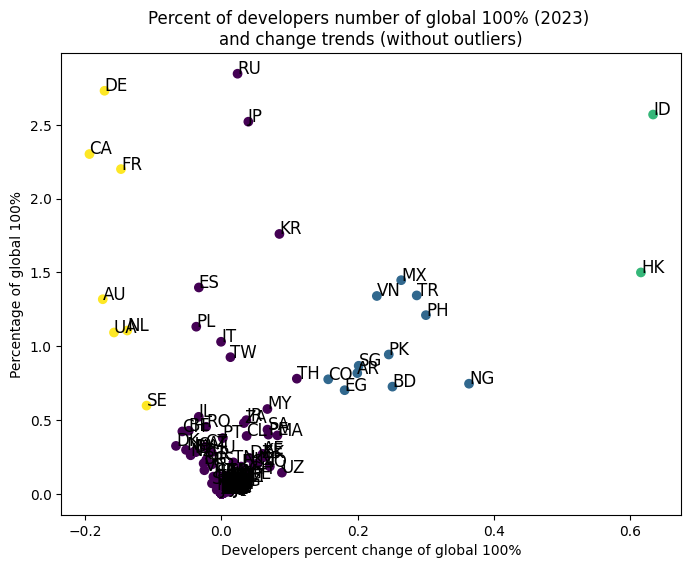

In [ ]:
copy_values = developers_aggregates[developers_aggregates["total_percent_2023"] < 3]

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['iso2_code'],
            x_data=copy_values['total_percent_diff'],
            y_data=copy_values['total_percent_2023'],
            title="Percent of developers number of global 100% (2023) \nand change trends (without outliers)",
            x_label="Developers percent change of global 100%",
            y_label="Percentage of global 100%")

# Economics: Production to others countries

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies,
    country_column="source"
)

Total values changed from 4516494 in 2020 to 8815383 in 2023 = 95.18199293522808%
    


<ipython-input-132-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]


In [ ]:
aggregated_weights[:3]

source         weight  diff_value  diff_percent  total_percent_2020  \
0     AD    [560, 3578]        3018    538.928571            0.011044   
1     AE  [7330, 49842]       42512    579.972715            0.144563   
2     AF         [1426]        1426    100.000000            0.000000   

   total_percent_2023  total_percent_diff  
0            0.036535            0.025490  
1            0.508932            0.364369  
2            0.014561            0.014561

## Relative values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


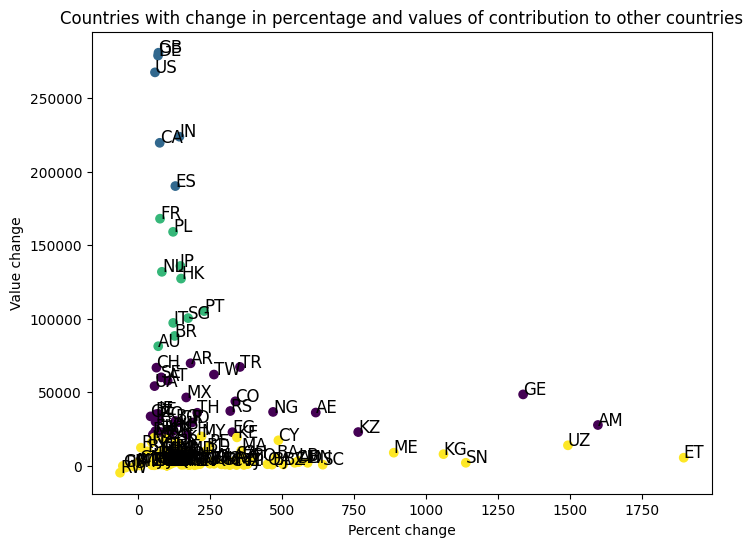

In [ ]:
copy_values = aggregated_weights

plot_kmeans(kmeans_data=copy_values[['diff_value']],
            country_codes_data=copy_values['source'],
            x_data=copy_values['diff_percent'],
            y_data=copy_values['diff_value'],
            title="Countries with relative change in percentage and values of contribution to other countries",
            x_label="Percent change",
            y_label="Value change")

<ipython-input-150-d4228d6c6e3b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  copy_values = aggregated_weights[aggregated_weights.diff_value < 100000][aggregated_weights.diff_percent < 500]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


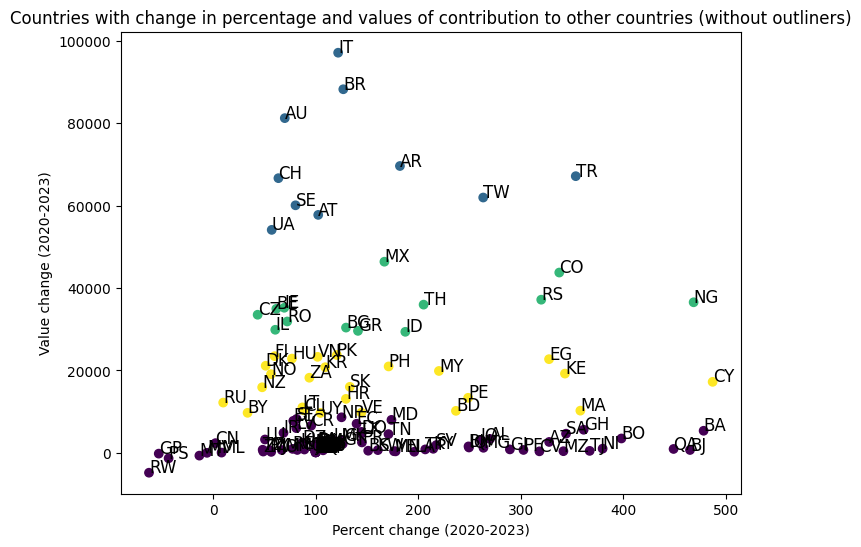

In [ ]:
copy_values = aggregated_weights[aggregated_weights.diff_value < 100000][aggregated_weights.diff_percent < 500]

plot_kmeans(kmeans_data=copy_values[['diff_value']],
            country_codes_data=copy_values['source'],
            x_data=copy_values['diff_percent'],
            y_data=copy_values['diff_value'],
            title="Countries with change in percentage and values of contribution to other countries (without outliners)",
            x_label="Percent change (2020-2023)",
            y_label="Value change (2020-2023)")

## Absolute values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


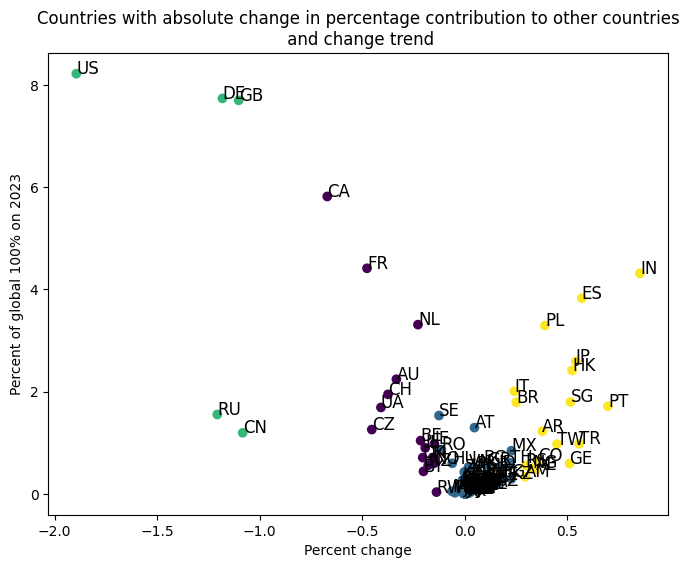

In [ ]:
copy_values = aggregated_weights

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['source'],
            x_data=copy_values['total_percent_diff'],
            y_data=copy_values['total_percent_2023'],
            title="Countries with absolute change in percentage contribution to other countries\n and change trend",
            x_label="Percent change",
            y_label="Percent of global 100% on 2023")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


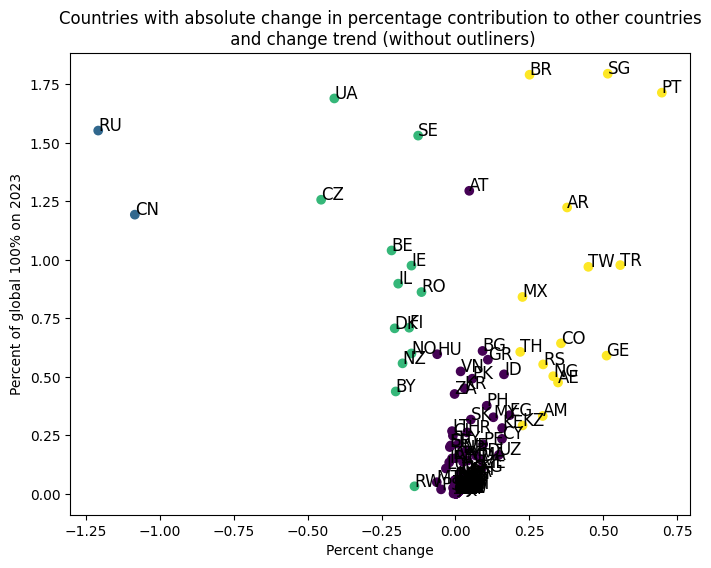

In [ ]:
copy_values = aggregated_weights[aggregated_weights["total_percent_2023"] < 1.8]

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['source'],
            x_data=copy_values['total_percent_diff'],
            y_data=copy_values['total_percent_2023'],
            title="Countries with absolute change in percentage contribution to other countries\n and change trend (without outliners)",
            x_label="Percent change",
            y_label="Percent of global 100% on 2023")

Text(0.5, 1.0, 'Simple Matplotlib Example')

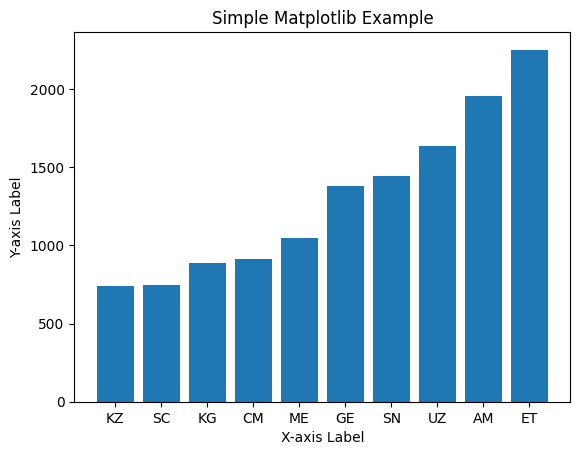

In [ ]:
to_plot_values = aggregated_weights.sort_values("diff_percent")[-10:]

plt.bar(to_plot_values["source"], to_plot_values["diff_percent"])

plt.xlabel('Country code')
plt.ylabel('Percent change')
plt.title('Fastest growing countries (from code producing point of view)')

Text(0.5, 1.0, 'Actual values of fastest growing countries (from code producing point of view)')

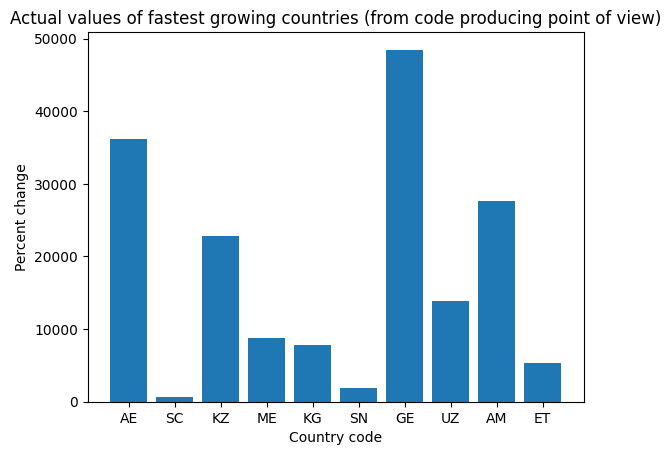

In [ ]:
to_plot_values = aggregated_weights.sort_values("diff_percent")[-10:]

plt.bar(to_plot_values["source"], to_plot_values["diff_value"])

plt.xlabel('Country code')
plt.ylabel('Percent change')
plt.title('Actual values of fastest growing countries (from code producing point of view)')

Text(0.5, 1.0, 'Countries that produces more code to third countries')

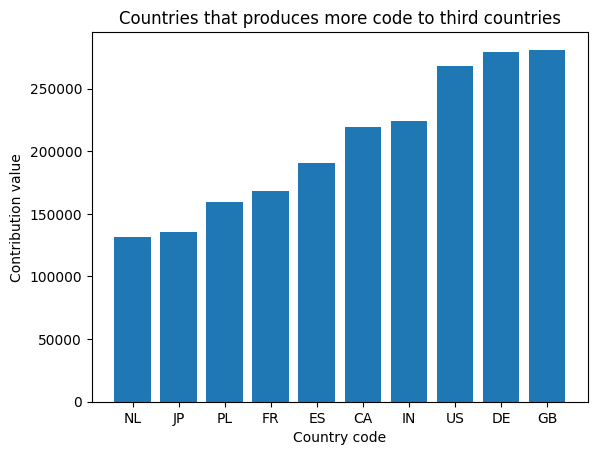

In [ ]:
to_plot_values = aggregated_weights.sort_values("diff_value")[-10:]

plt.bar(to_plot_values["source"], to_plot_values["diff_value"])

plt.xlabel('Country code')
plt.ylabel('Contribution value')
plt.title('Countries that produces more code to third countries')

Text(0.5, 1.0, 'The most increase of global contribution to third countries')

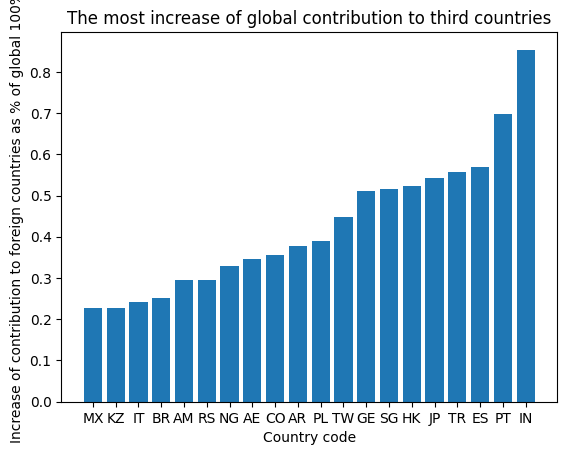

In [ ]:
to_plot_values = aggregated_weights.sort_values("total_percent_diff")[-20:]

plt.bar(to_plot_values["source"], to_plot_values["total_percent_diff"])

plt.xlabel('Country code')
plt.ylabel('Increase of contribution to foreign countries as % of global 100%')
plt.title('The most increase of global contribution to third countries')

Text(0.5, 1.0, 'Countries with the most contribution (to third countries) decrease in percantage of global 100%')

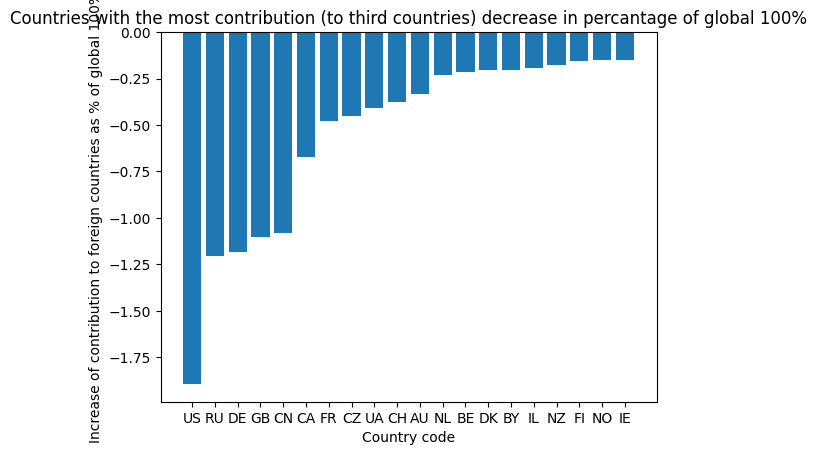

In [ ]:
to_plot_values = aggregated_weights.sort_values("total_percent_diff")[:20]

plt.bar(to_plot_values["source"], to_plot_values["total_percent_diff"])

plt.xlabel('Country code')
plt.ylabel('Increase of contribution to foreign countries as % of global 100%')
plt.title('Countries with the most contribution (to third countries) decrease in percantage of global 100%')

# Economics: Consumption from other countries

In [ ]:
dest_aggregated_weights = get_aggregated_values(
    filtered_data=economies,
    country_column="destination"
)

Total values changed from 4515311 in 2020 to 8812279 in 2023 = 95.16438624050481%
    


<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]


## Relative values

Text(0.5, 1.0, 'The most contribution consumption increase (relatively per country)')

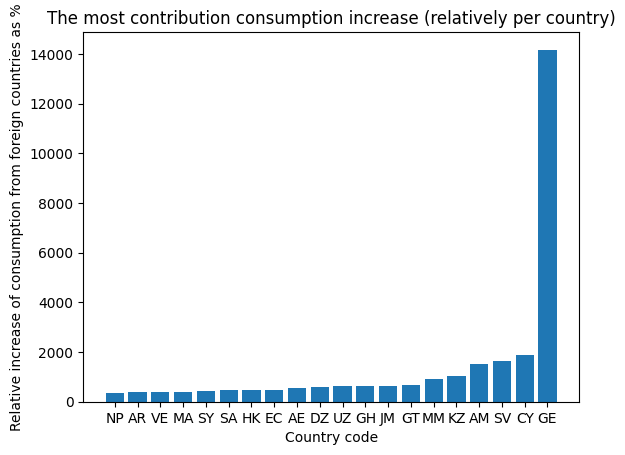

In [ ]:
to_plot_values = dest_aggregated_weights.sort_values("diff_percent")[-20:]

plt.bar(to_plot_values["destination"], to_plot_values["diff_percent"])

plt.xlabel('Country code')
plt.ylabel('Relative increase of consumption from foreign countries as %')
plt.title('The most contribution consumption increase (relatively per country)')

Text(0.5, 1.0, 'The most contribution consumption decrease (relatively per country)')

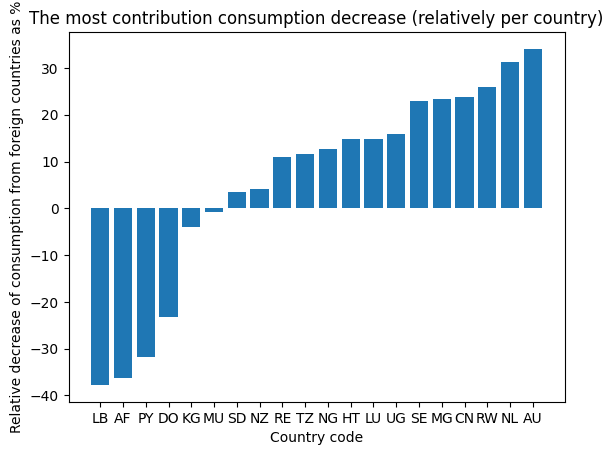

In [ ]:
to_plot_values = dest_aggregated_weights.sort_values("diff_percent")[:20]

plt.bar(to_plot_values["destination"], to_plot_values["diff_percent"])

plt.xlabel('Country code')
plt.ylabel('Relative decrease of consumption from foreign countries as %')
plt.title('The most contribution consumption decrease (relatively per country)')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


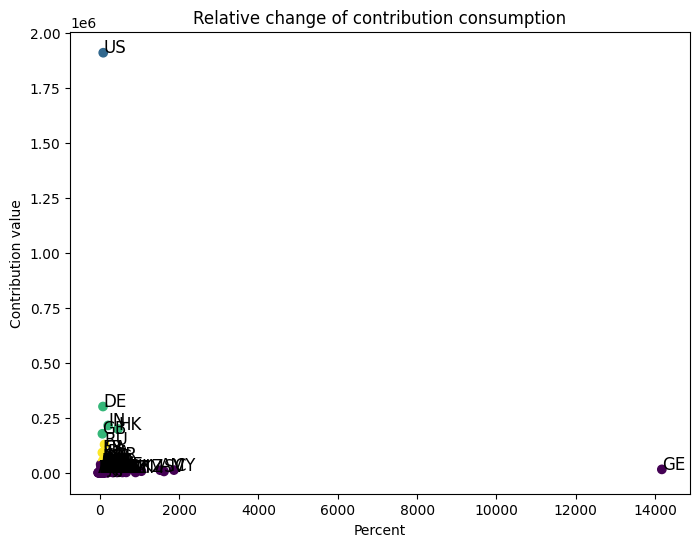

In [ ]:
copy_values = dest_aggregated_weights

plot_kmeans(kmeans_data=copy_values[['diff_value', 'diff_percent']],
            country_codes_data=copy_values['destination'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative change of contribution consumption",
            x_label="Percent",
            y_label="Contribution value")

<ipython-input-102-a37ee6bea12b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  copy_values = dest_aggregated_weights[dest_aggregated_weights.destination != 'US'][dest_aggregated_weights.destination != 'GE']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


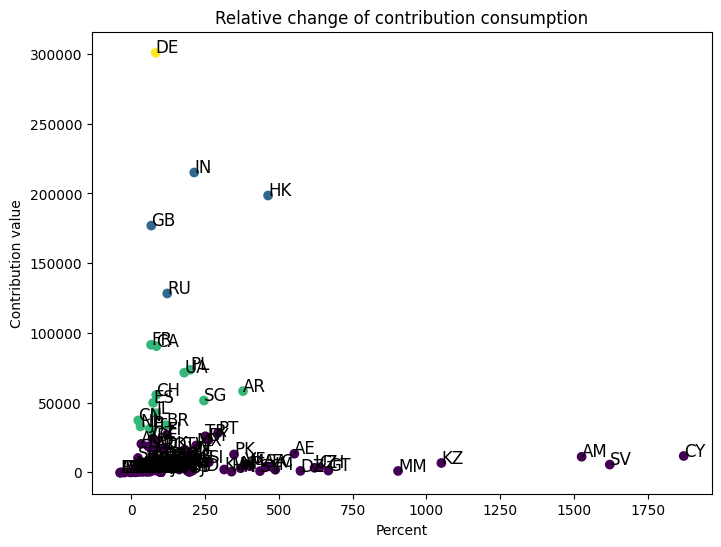

In [ ]:
copy_values = dest_aggregated_weights[dest_aggregated_weights.destination != 'US'][dest_aggregated_weights.destination != 'GE']

plot_kmeans(kmeans_data=copy_values[['diff_value', 'diff_percent']],
            country_codes_data=copy_values['destination'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative change of contribution consumption",
            x_label="Percent",
            y_label="Contribution value")

<ipython-input-181-0223a5c23e48>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  copy_values = dest_aggregated_weights[dest_aggregated_weights["diff_percent"] < 750][dest_aggregated_weights["diff_value"] < 50000]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


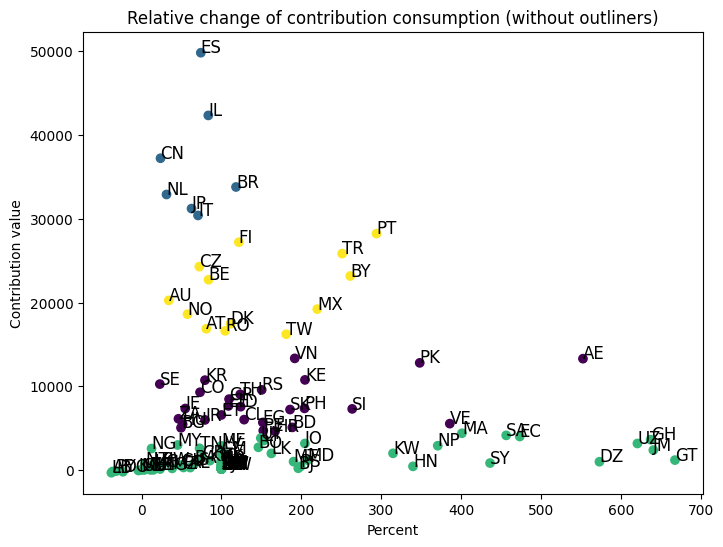

In [ ]:
copy_values = dest_aggregated_weights[dest_aggregated_weights["diff_percent"] < 750][dest_aggregated_weights["diff_value"] < 50000]

plot_kmeans(kmeans_data=copy_values[['diff_value', 'diff_percent']],
            country_codes_data=copy_values['destination'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative change of contribution consumption (without outliners)",
            x_label="Percent",
            y_label="Contribution value")

## Absolute values

Text(0.5, 1.0, 'Contries that decries consumption of global percentage')

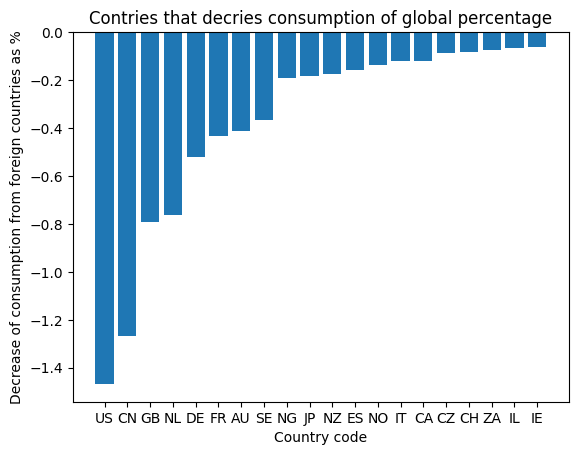

In [ ]:
to_plot_values = dest_aggregated_weights.sort_values("total_percent_diff")[:20]

plt.bar(to_plot_values["destination"], to_plot_values["total_percent_diff"])

plt.xlabel('Country code')
plt.ylabel('Decrease of consumption from foreign countries as %')
plt.title('Contries that decries consumption of global percentage')

Text(0.5, 1.0, 'Contries that decries consumption of global percentage')

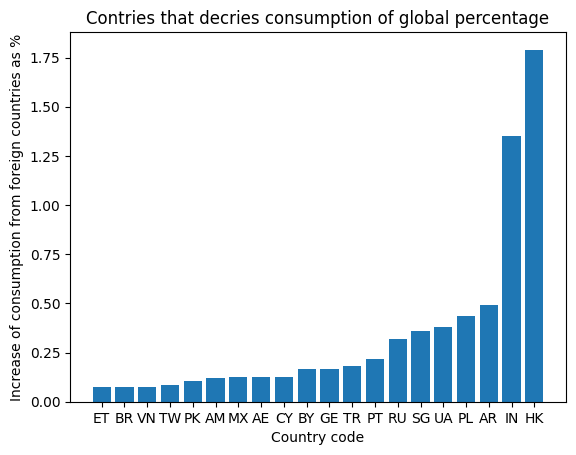

In [ ]:
to_plot_values = dest_aggregated_weights.sort_values("total_percent_diff")[-20:]

plt.bar(to_plot_values["destination"], to_plot_values["total_percent_diff"])

plt.xlabel('Country code')
plt.ylabel('Increase of consumption from foreign countries as %')
plt.title('Contries that decries consumption of global percentage')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


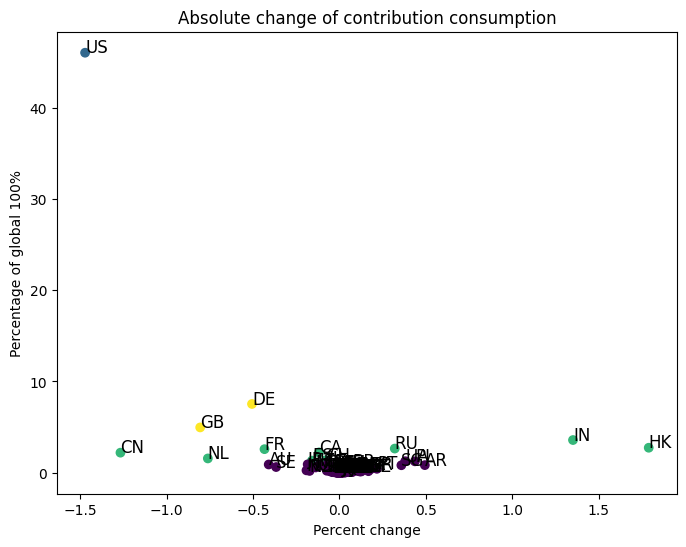

In [ ]:
copy_values = dest_aggregated_weights

plot_kmeans(kmeans_data=copy_values[['total_percent_2020', 'total_percent_2023', 'total_percent_diff']],
            country_codes_data=copy_values['destination'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute change of contribution consumption",
            x_label="Percent change",
            y_label="Percentage of global 100%")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


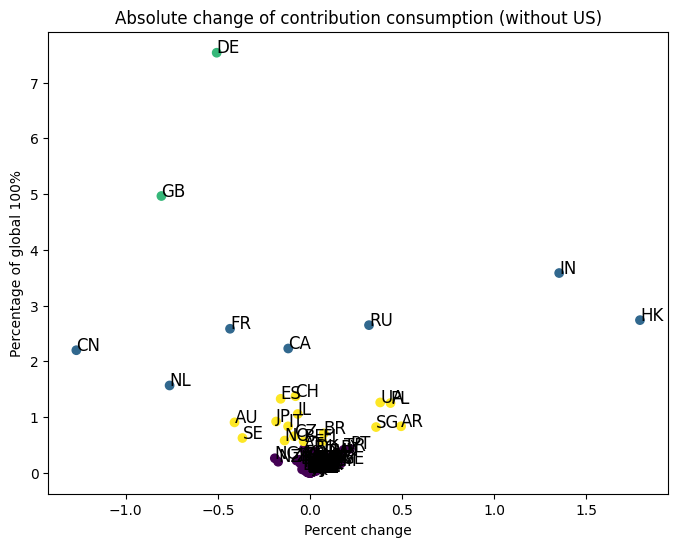

In [ ]:
copy_values = dest_aggregated_weights[dest_aggregated_weights["destination"]!="US"]

plot_kmeans(kmeans_data=copy_values[['total_percent_2020', 'total_percent_2023', 'total_percent_diff']],
            country_codes_data=copy_values['destination'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute change of contribution consumption (without US)",
            x_label="Percent change",
            y_label="Percentage of global 100%")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


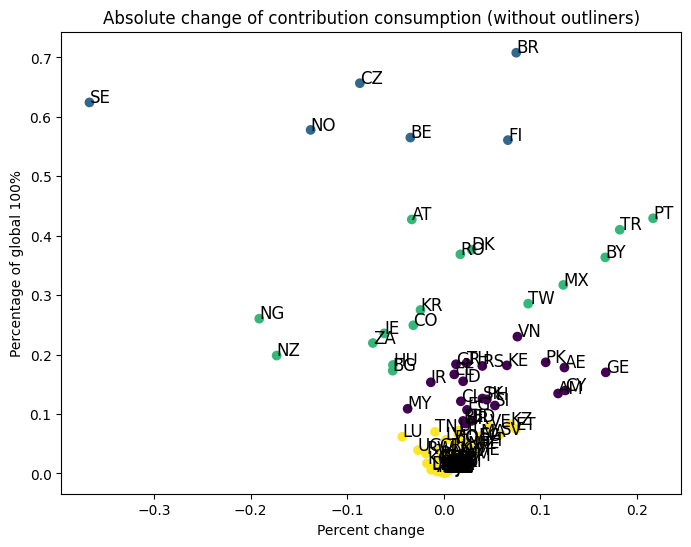

In [ ]:
copy_values = dest_aggregated_weights[dest_aggregated_weights["total_percent_2023"]<0.8]

plot_kmeans(kmeans_data=copy_values[['total_percent_2020', 'total_percent_2023', 'total_percent_diff']],
            country_codes_data=copy_values['destination'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute change of contribution consumption (without outliners)",
            x_label="Percent change",
            y_label="Percentage of global 100%")

## Relative growth for consumption

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


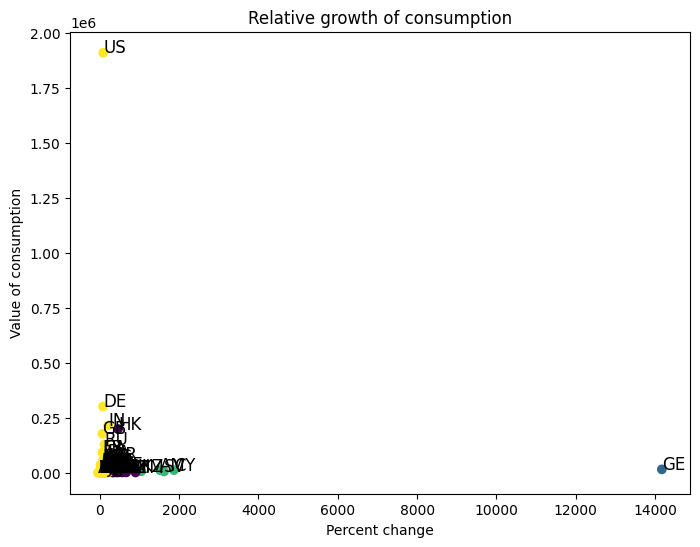

In [ ]:
copy_values = dest_aggregated_weights

plot_kmeans(kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['destination'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative growth of consumption",
            x_label="Percent change",
            y_label="Value of consumption")

<ipython-input-66-320659191be7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  copy_values = dest_aggregated_weights[dest_aggregated_weights["destination"]!="US"][dest_aggregated_weights["destination"]!="GE"]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


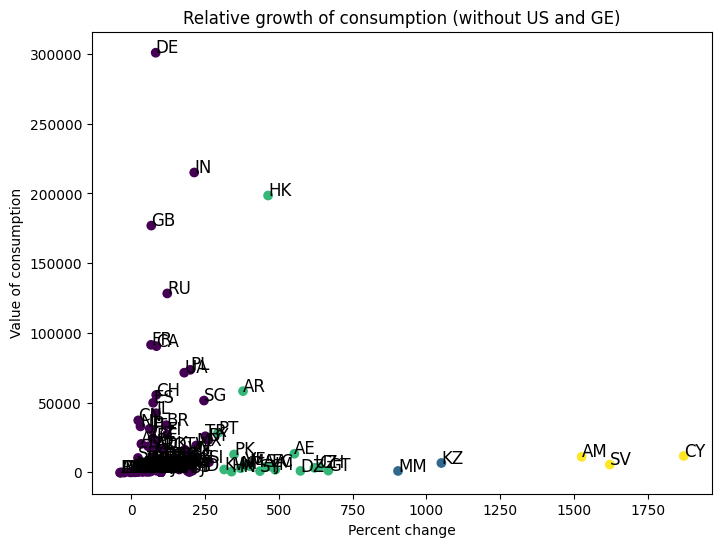

In [ ]:
copy_values = dest_aggregated_weights[dest_aggregated_weights["destination"]!="US"][dest_aggregated_weights["destination"]!="GE"]

plot_kmeans(kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['destination'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative growth of consumption (without US and GE)",
            x_label="Percent change",
            y_label="Value of consumption")

<ipython-input-67-d0242c1aad07>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  copy_values = dest_aggregated_weights[dest_aggregated_weights["diff_percent"]<750][dest_aggregated_weights["diff_value"]<50000]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


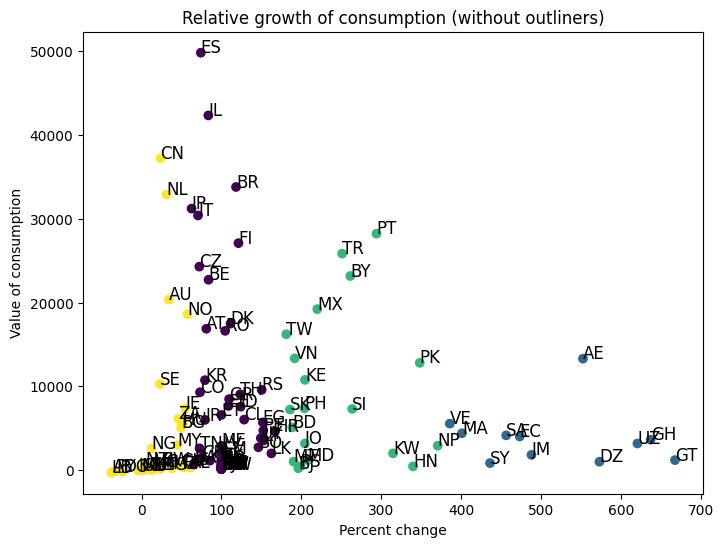

In [ ]:
copy_values = dest_aggregated_weights[dest_aggregated_weights["diff_percent"]<750][dest_aggregated_weights["diff_value"]<50000]

plot_kmeans(kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['destination'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative growth of consumption (without outliners)",
            x_label="Percent change",
            y_label="Value of consumption")

# Economics: Production to US

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 2145025 in 2020 to 4057251 in 2023 = 89.14702625843522%
    


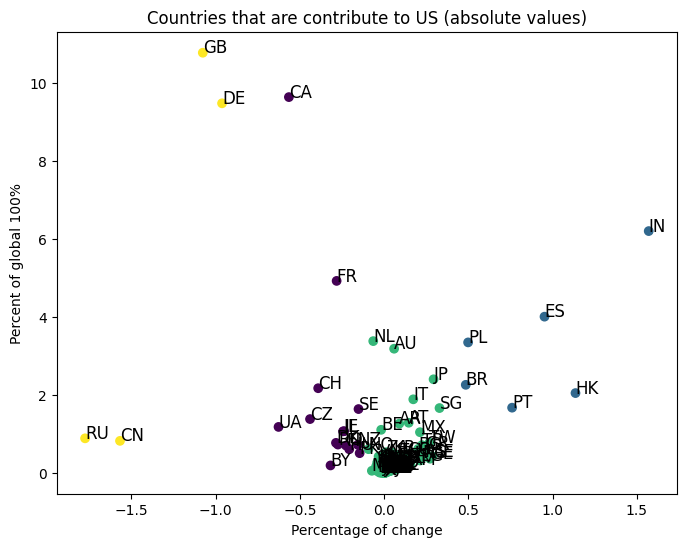

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.destination == "US"],
    country_column="source",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['source'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Countries that are contribute to US (absolute values)",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 456672 in 2020 to 724332 in 2023 = 58.61099432415388%
    


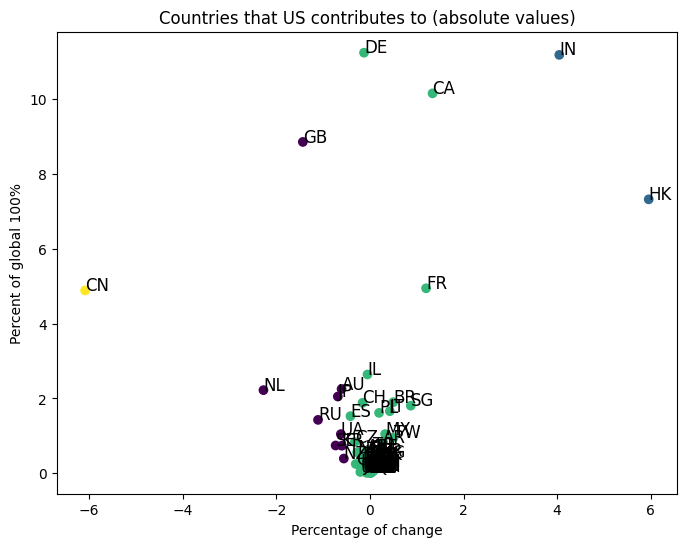

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.source == "US"],
    country_column="destination",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['destination'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Countries that US contributes to (absolute values)",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 2145025 in 2020 to 4057251 in 2023 = 89.14702625843522%
    


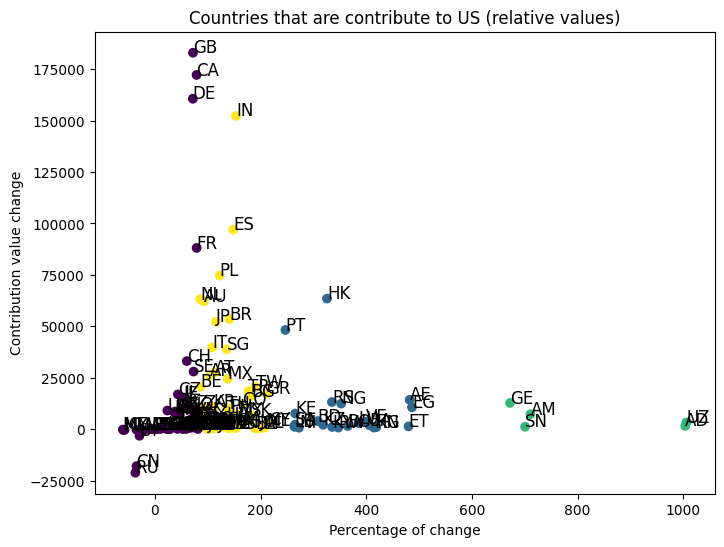

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.destination == "US"],
    country_column="source",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['source'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Countries that are contribute to US (relative values)",
            x_label="Percentage of change",
            y_label="Contribution value change")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 456672 in 2020 to 724332 in 2023 = 58.61099432415388%
    


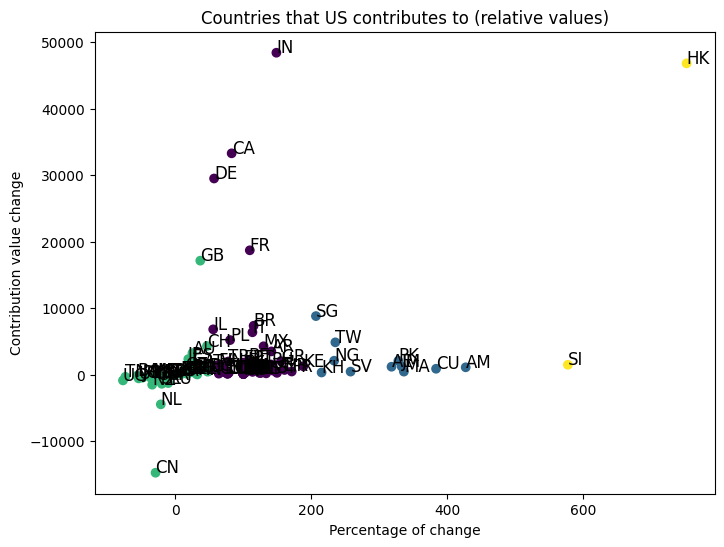

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.source == "US"],
    country_column="destination",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['destination'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Countries that US contributes to (relative values)",
            x_label="Percentage of change",
            y_label="Contribution value change")

# Economics: Production to RU

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 105159 in 2020 to 233449 in 2023 = 121.99621525499482%
    


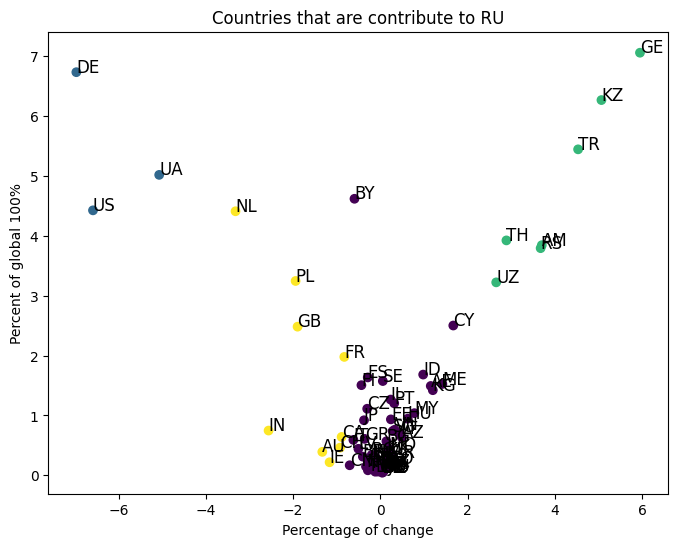

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.destination == "RU"],
    country_column="source",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['source'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Countries that are contribute to RU",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 124614 in 2020 to 136801 in 2023 = 9.779800022469386%
    


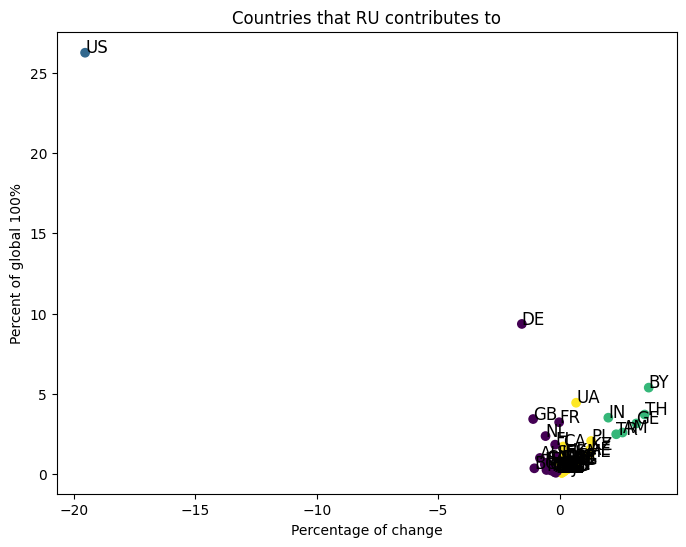

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.source == "RU"],
    country_column="destination",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['destination'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Countries that RU contributes to",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 124614 in 2020 to 136801 in 2023 = 9.779800022469386%
    


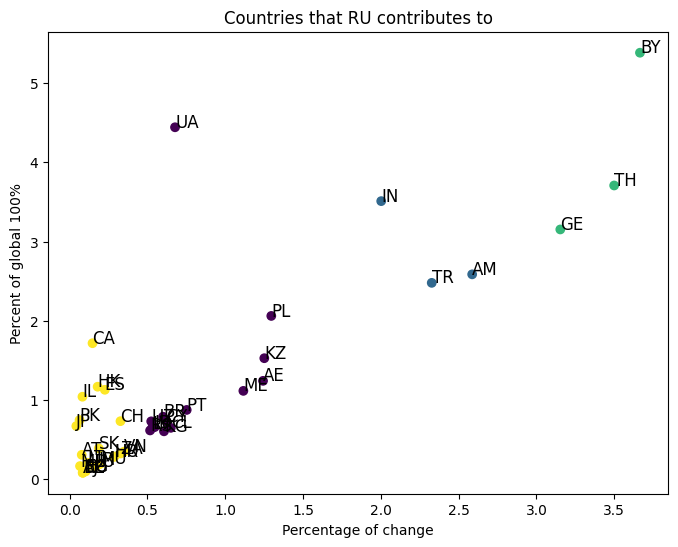

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.source == "RU"],
    country_column="destination",
    weight_column="weight"
)

copy_values = aggregated_weights[aggregated_weights["total_percent_diff"] > 0]

plot_kmeans(clusters=4, kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['destination'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Countries that RU contributes to",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

## Relative values

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 105159 in 2020 to 233449 in 2023 = 121.99621525499482%
    


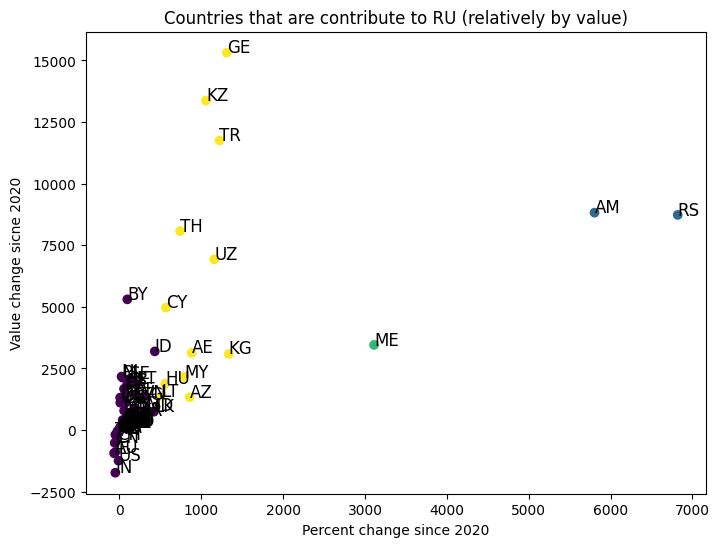

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.destination == "RU"],
    country_column="source",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['source'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Countries that are contribute to RU (relatively by value)",
            x_label="Percent change since 2020",
            y_label="Value change sicne 2020")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 124614 in 2020 to 136801 in 2023 = 9.779800022469386%
    


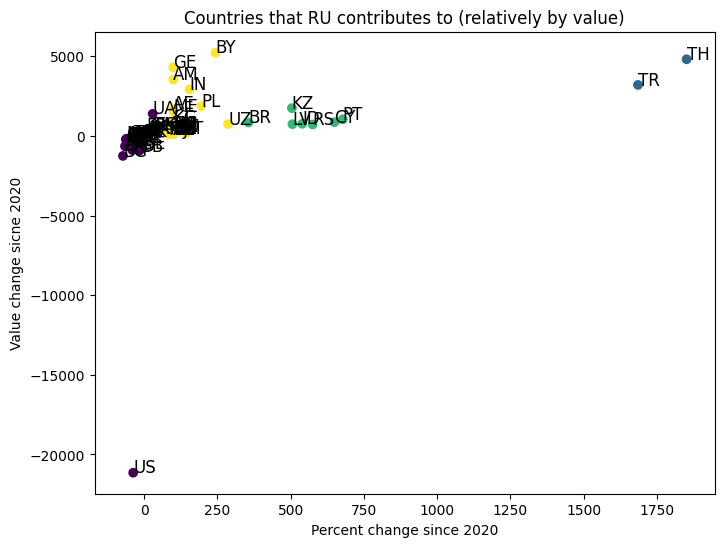

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.source == "RU"],
    country_column="destination",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['destination'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Countries that RU contributes to (relatively by value)",
            x_label="Percent change since 2020",
            y_label="Value change sicne 2020")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
<ipython-input-31-8caf3a6f78d9>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  copy_values = aggregated_weights[aggregated_weights["diff_percent"] > 0][aggregated_weights["diff_value"] > 500]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 124614 in 2020 to 136801 in 2023 = 9.779800022469386%
    


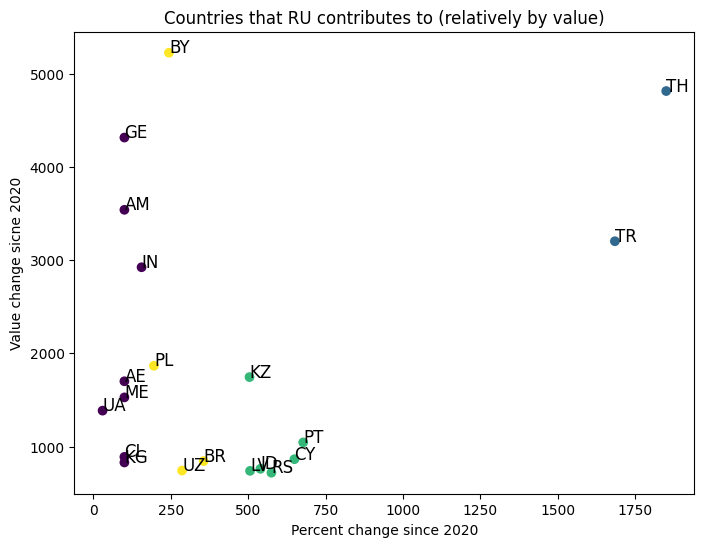

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.source == "RU"],
    country_column="destination",
    weight_column="weight"
)

copy_values = aggregated_weights[aggregated_weights["diff_percent"] > 0][aggregated_weights["diff_value"] > 500]

plot_kmeans(clusters=4, kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['destination'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Countries that RU contributes to (relatively by value)",
            x_label="Percent change since 2020",
            y_label="Value change sicne 2020")

# Economics: from CN to HK

<ipython-input-5-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 156559 in 2020 to 193794 in 2023 = 23.783366015368006%
    


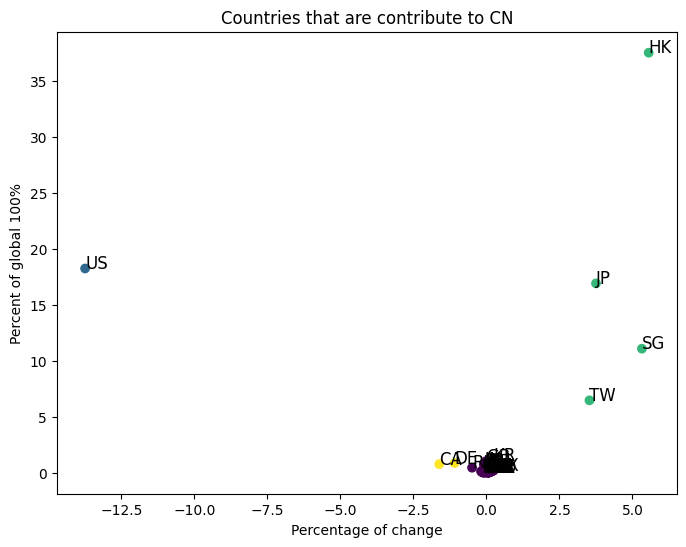

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.destination == "CN"],
    country_column="source",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['source'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Countries that are contribute to CN",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-5-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 102809 in 2020 to 105148 in 2023 = 2.275092647530858%
    


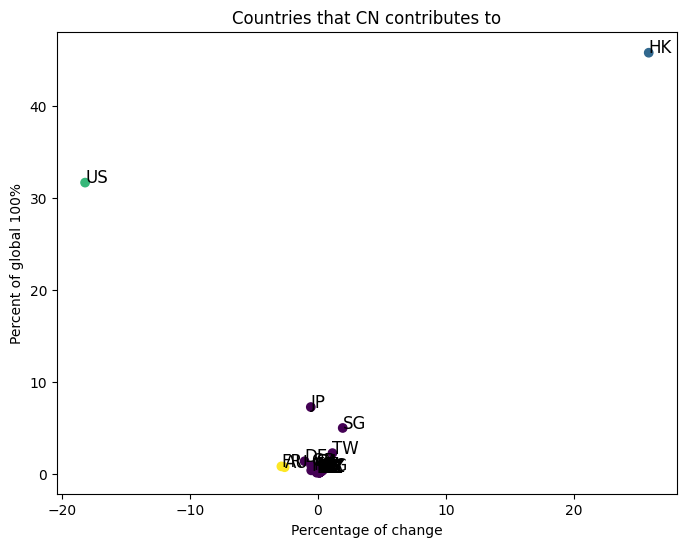

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.source == "CN"],
    country_column="destination",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['destination'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Countries that CN contributes to",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-5-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 42827 in 2020 to 241383 in 2023 = 463.62341513531186%
    


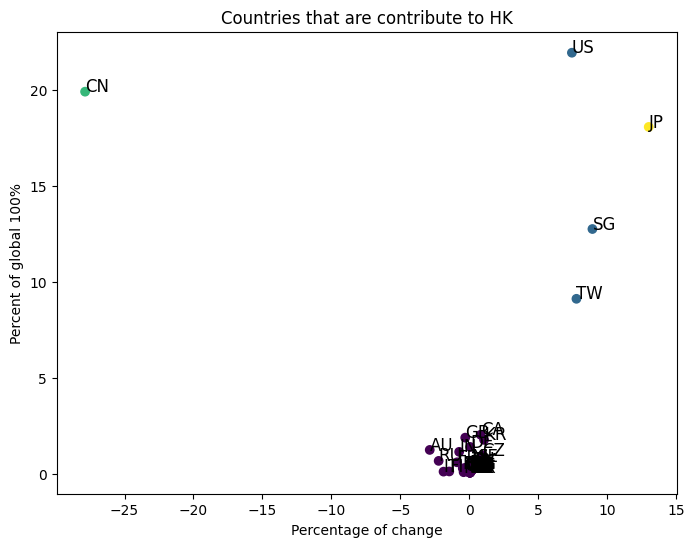

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.destination == "HK"],
    country_column="source",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['source'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Countries that are contribute to HK",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-5-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 85363 in 2020 to 212667 in 2023 = 149.13252814451226%
    


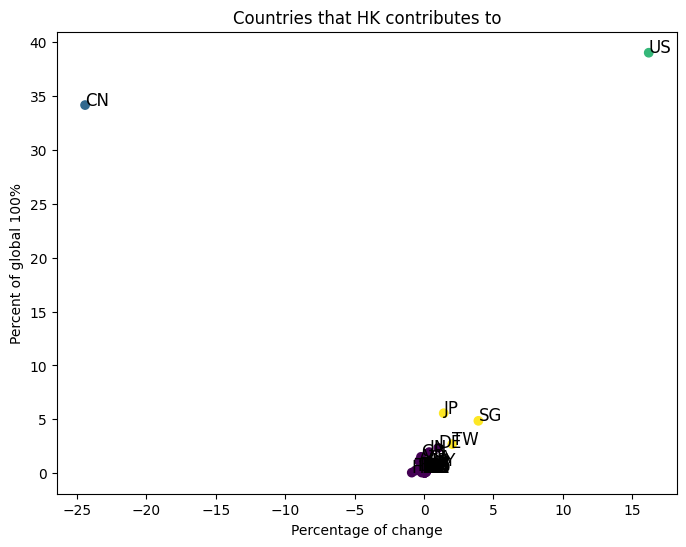

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.source == "HK"],
    country_column="destination",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['destination'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Countries that HK contributes to",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-5-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 8951 in 2020 to 25167 in 2023 = 181.16411574125797%
    


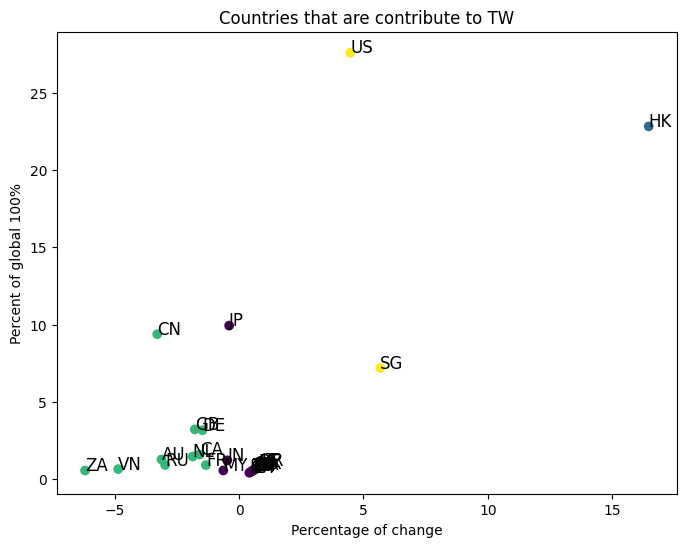

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.destination == "TW"],
    country_column="source",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['source'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Countries that are contribute to TW",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-5-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 23533 in 2020 to 85510 in 2023 = 263.3620872816895%
    


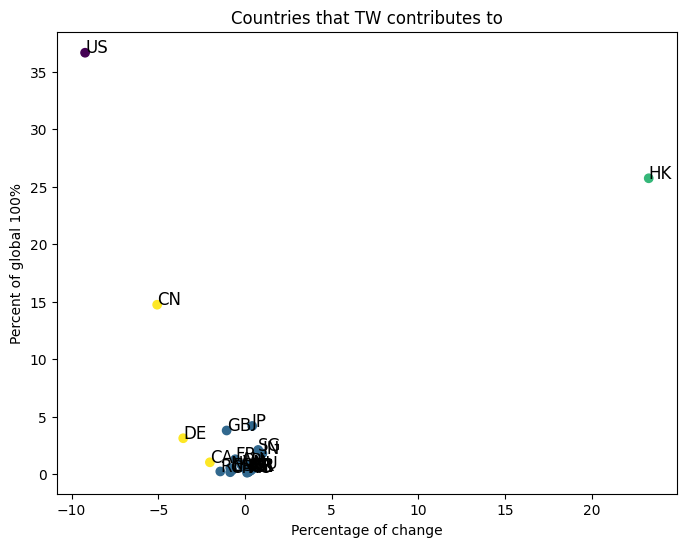

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.source == "TW"],
    country_column="destination",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['destination'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Countries that TW contributes to",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-5-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 20871 in 2020 to 72323 in 2023 = 246.52388481625223%
    


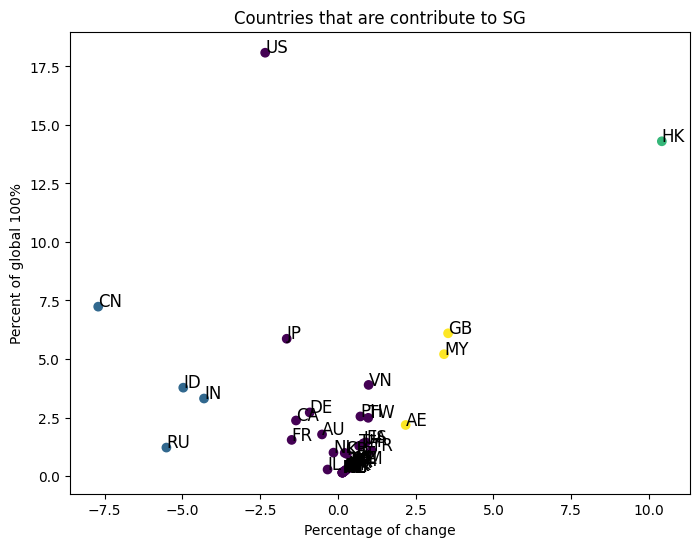

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.destination == "SG"],
    country_column="source",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['source'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Countries that are contribute to SG",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-5-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 57809 in 2020 to 158199 in 2023 = 173.6580809216558%
    


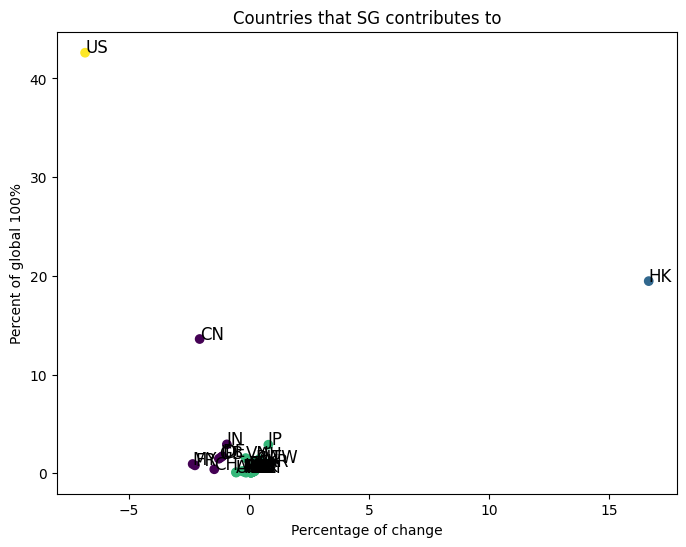

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.source == "SG"],
    country_column="destination",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['destination'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Countries that SG contributes to",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

# Economics: Production to DE

<ipython-input-11-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 363968 in 2020 to 664406 in 2023 = 82.54516880604889%
    


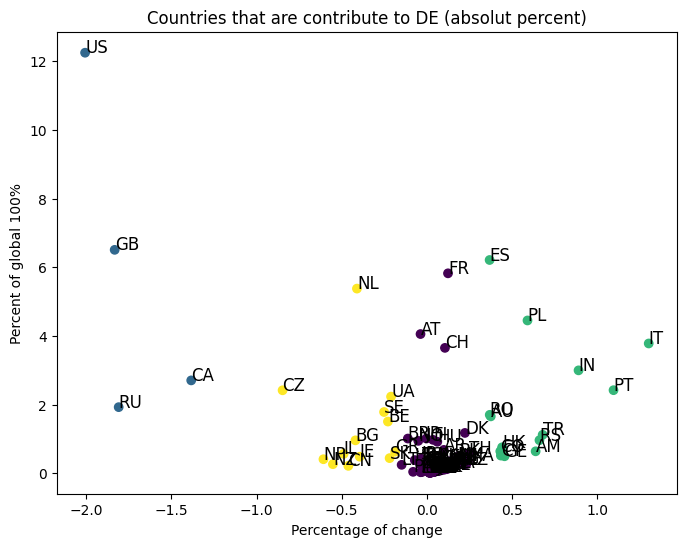

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.destination == "DE"],
    country_column="source",
    weight_column="weight"
)
copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['source'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Countries that are contribute to DE (absolut percent)",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-11-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 363968 in 2020 to 664406 in 2023 = 82.54516880604889%
    


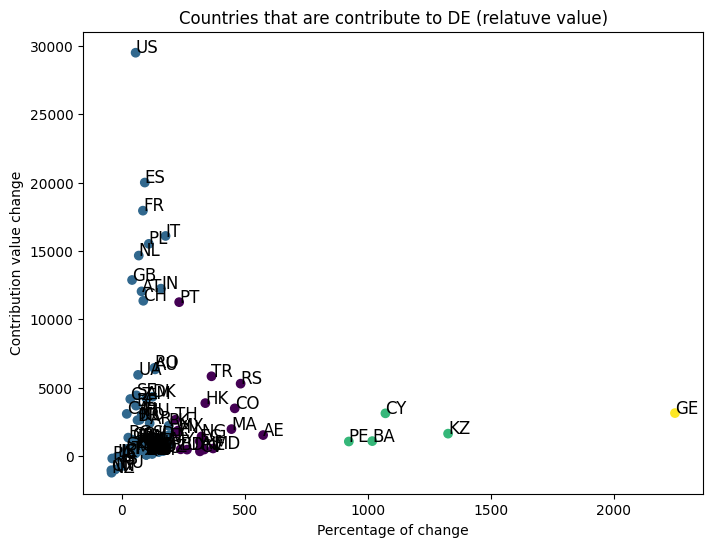

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.destination == "DE"],
    country_column="source",
    weight_column="weight"
)
copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['source'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Countries that are contribute to DE (relatuve value)",
            x_label="Percentage of change",
            y_label="Contribution value change")

# Economics: Production to GE

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 105 in 2020 to 14984 in 2023 = 14170.47619047619%
    


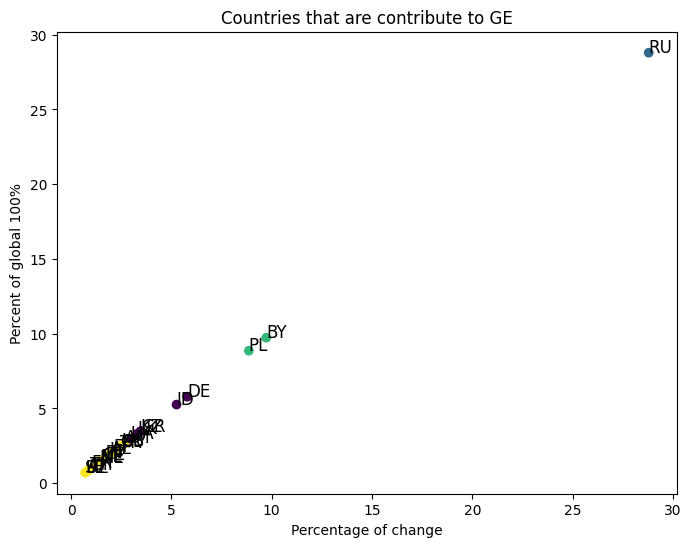

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.destination == "GE"],
    country_column="source",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['source'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Countries that are contribute to GE",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 3625 in 2020 to 52083 in 2023 = 1336.7724137931034%
    


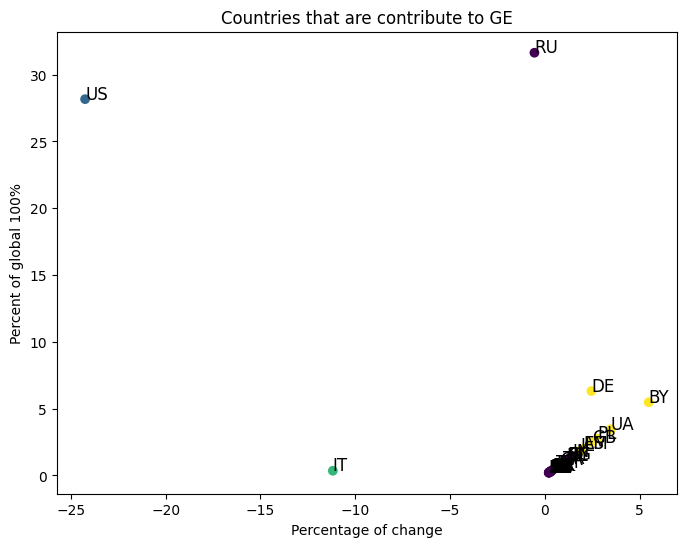

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.source == "GE"],
    country_column="destination",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['destination'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Countries that are contribute to GE",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

## Change by value

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-3-245fdff3721c>:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(kmeans_data)


Total values changed from 105 in 2020 to 14984 in 2023 = 14170.47619047619%
    


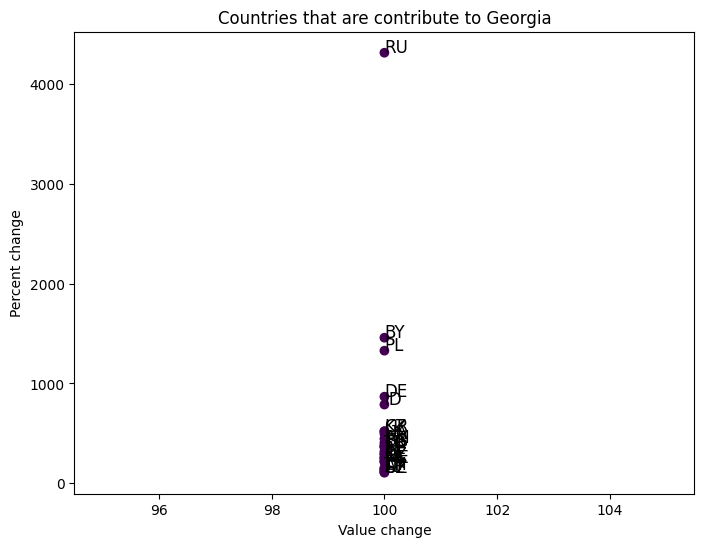

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.destination == "GE"],
    country_column="source",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['source'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Countries that are contribute to Georgia",
            x_label="Value change",
            y_label="Percent change")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 3625 in 2020 to 52083 in 2023 = 1336.7724137931034%
    


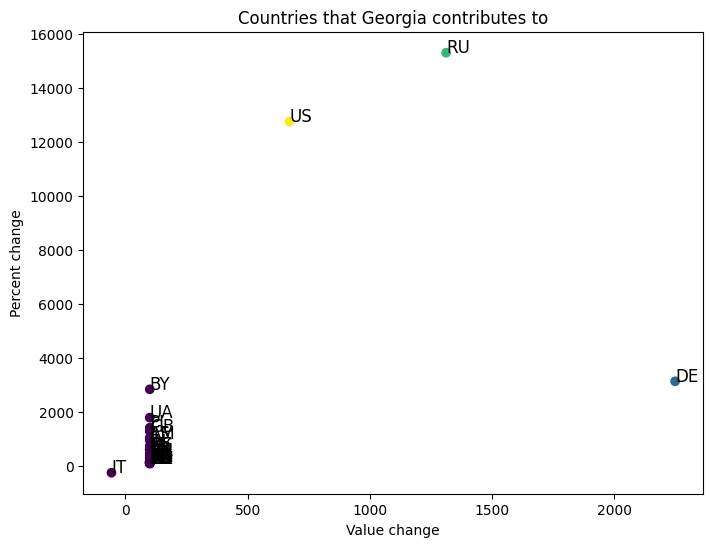

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.source == "GE"],
    country_column="destination",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['destination'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Countries that Georgia contributes to",
            x_label="Value change",
            y_label="Percent change")

# Economics: CY (Cyprus)

<ipython-input-11-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 624 in 2020 to 12303 in 2023 = 1871.6346153846152%
    


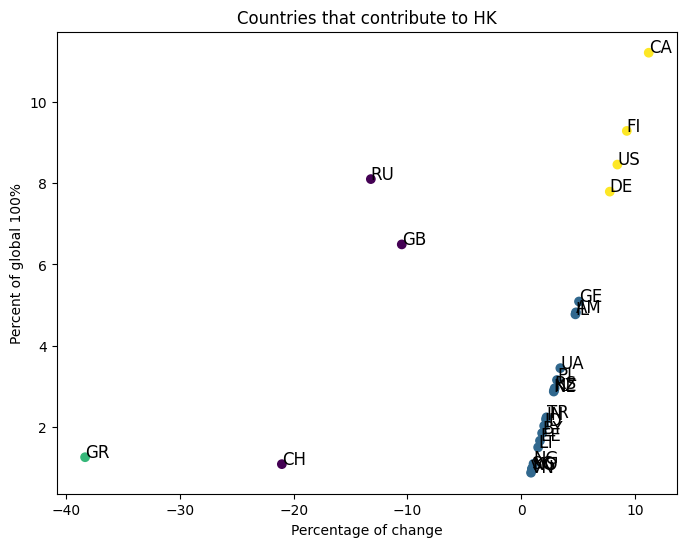

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.destination == "CY"],
    country_column="source",
    weight_column="weight"
)
copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['source'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Countries that contribute to HK",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 3535 in 2020 to 20755 in 2023 = 487.1287128712871%
    


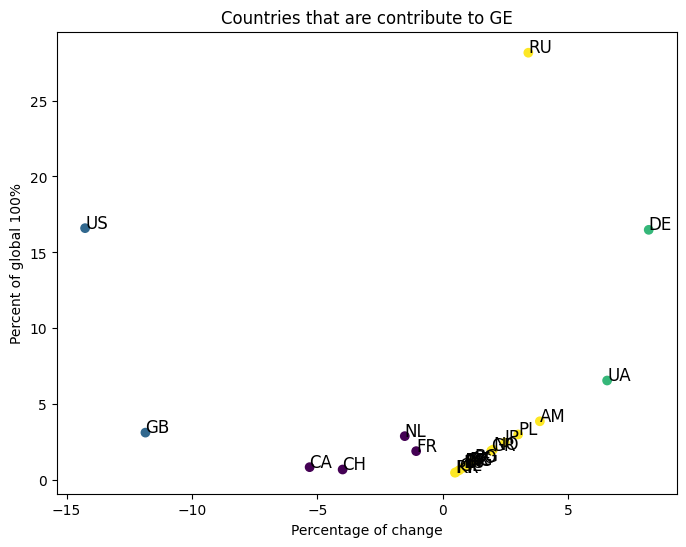

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.source == "CY"],
    country_column="destination",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['destination'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Countries that are contribute to GE",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-11-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 624 in 2020 to 12303 in 2023 = 1871.6346153846152%
    


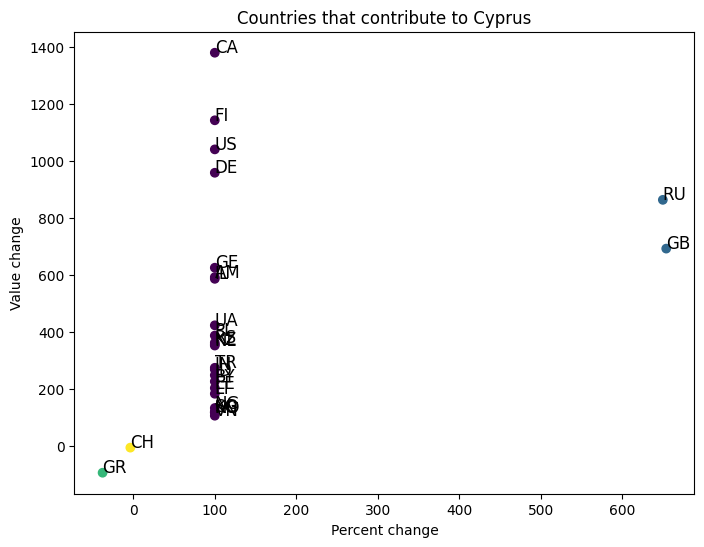

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.destination == "CY"],
    country_column="source",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['source'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Countries that contribute to Cyprus",
            x_label="Percent change",
            y_label="Value change")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 3535 in 2020 to 20755 in 2023 = 487.1287128712871%
    


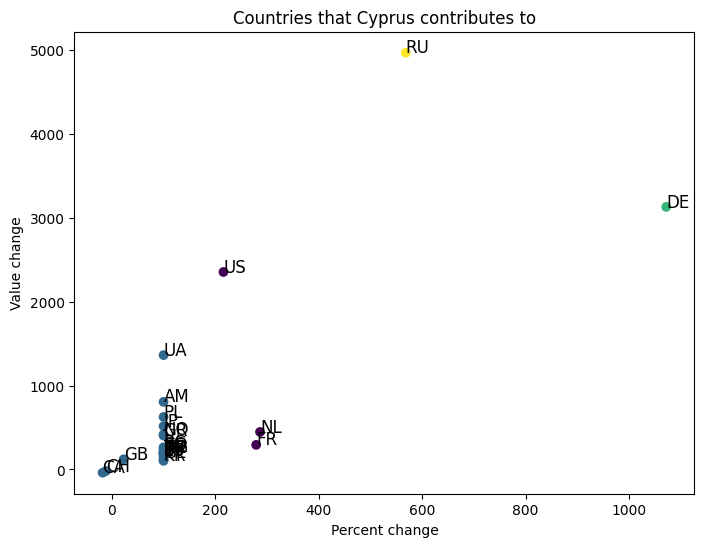

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.source == "CY"],
    country_column="destination",
    weight_column="weight"
)

copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['destination'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Countries that Cyprus contributes to",
            x_label="Percent change",
            y_label="Value change")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 3060489 in 2020 to 5114334 in 2023 = 67.10839346261332%
    


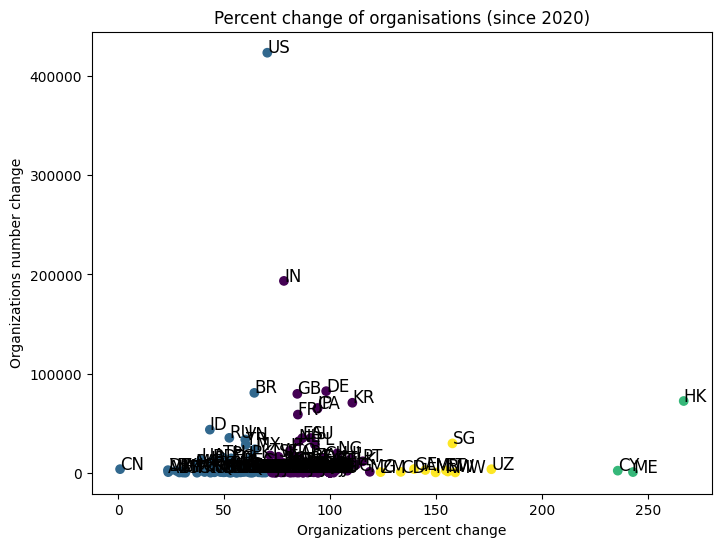

In [ ]:
organisation_agregates = get_aggregated_values(
    filtered_data=orgs,
    country_column="iso2_code",
    weight_column="organizations"
)
copy_values = organisation_agregates

plot_kmeans(kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['iso2_code'],
            x_data=copy_values['diff_percent'],
            y_data=copy_values['diff_value'],
            title="Percent change of organisations (since 2020)",
            x_label="Organizations percent change",
            y_label="Organizations number change")

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.destination == "CY"],
    country_column="source",
    weight_column="weight"
)

Total values changed from 624 in 2020 to 12303 in 2023 = 1871.6346153846152%
    


<ipython-input-11-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]


In [ ]:
aggregated_weights.head()

source      weight  diff_value  diff_percent  total_percent_2020  \
0     AM       [593]         593    100.000000            0.000000   
1     BY       [227]         227    100.000000            0.000000   
2     CA      [1380]        1380    100.000000            0.000000   
3     CH  [138, 133]          -5     -3.623188           22.115385   
4     DE       [959]         959    100.000000            0.000000   

   total_percent_2023  total_percent_diff  
0            4.819963            4.819963  
1            1.845078            1.845078  
2           11.216776           11.216776  
3            1.081037          -21.034347  
4            7.794847            7.794847

In [ ]:
countries_2020 = len(aggregated_weights[aggregated_weights.total_percent_2020 != 0])
countries_2023 = len(aggregated_weights)

In [ ]:
countries_2020

4

In [ ]:
countries_2023

27

# Economics: Production to HK

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 42827 in 2020 to 241383 in 2023 = 463.62341513531186%
    


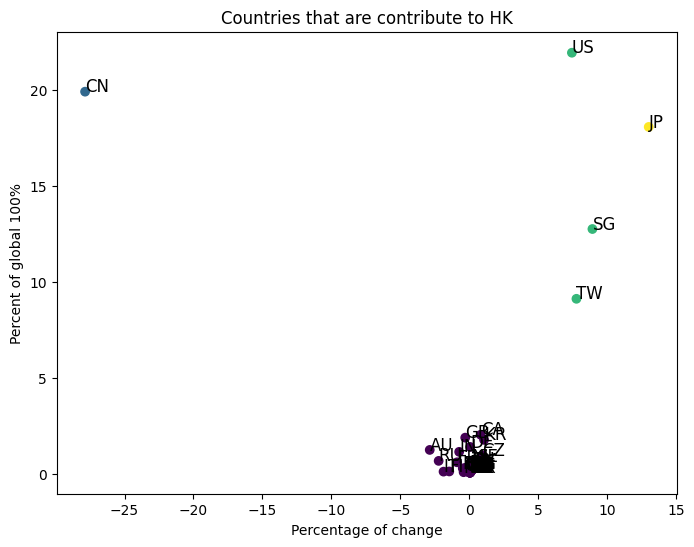

In [ ]:
aggregated_weights = get_aggregated_values(
    filtered_data=economies[economies.destination == "HK"],
    country_column="source",
    weight_column="weight"
)
copy_values = aggregated_weights

plot_kmeans(clusters=4, kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['source'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Countries that are contribute to HK",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

# Economics: per continent

In [ ]:
asia = [
 "CN", "IN","ID","JP","KR","VN","TR","TH","PH","HK","BD","PK","TW","IR","SG","MY","SA","IL","AE","LK","IQ","NP","MM","KH","KZ","JO","GE","PS","AZ","LB","UZ","AM","KW","MN","QA","YE","OM","SY","KG","BH","LA","AF","MO","BN","MV","TJ","BT","TM"
]
africa = [
 "EG","NG","MA","ZA","DZ","TN","KE","GH","CI","UG","CM","TZ","ET","SN","SD","AO","LY","ZW","RW","MG","BJ","MU","CD","MZ","ZM","SO","TG","RE","BW","BF","ML","MW","GN","SL","MR","LR","NA","GA","CV","CG","BI","GM","NE","LS","DJ","SC","SZ"
]
europe = [
 "GB","DE","FR","RU","ES","NL","UA","PL","IT","SE","CH","BE","RO","DK","NO","CZ","PT","AT","BG","FI","HU","IE","BY","GR","RS","SK","LT","HR","AL","EE","LV","SI","MD","BA","IS","MK","LU","CY","MT","ME","JE","IM","AD","XK","FO","MC"
]
north_america = [
 "US","CA","MX","DO","CR","GT","SV","PA","PR","HN","NI","JM","CU","HT","TT","GP","BS","BB","MQ","CW","BM","BZ","KY"
]
oceania = [
 "AU","NZ","NC","PF","FJ","PG","GU"
]
south_america = [
 "BR","CO","AR","PE","CL","VE","EC","BO","UY","PY","SR","GY"
]

In [ ]:
def choose_region(row, target_direction):
    if row[target_direction] in asia:
        return "asia"
    if row[target_direction] in africa:
        return "africa"
    if row[target_direction] in europe:
        return "europe"
    if row[target_direction] in north_america:
        return "north_america"
    if row[target_direction] in south_america:
        return "south_america"
    if row[target_direction] in oceania:
        return "oceania"
    else:
        return "unknown"

    return "unknown"

def choose_region_for_source(row):
  return choose_region(row, "source")


def choose_region_for_destination(row):
  return choose_region(row, "destination")

economies["source_region"] = economies.apply(choose_region_for_source, axis=1)
economies = economies[economies["source_region"] != "unknown"]
aggregated_weights = get_aggregated_values(
    filtered_data=economies,
    country_column="source_region",
    weight_column="weight"
)


economies["destination_region"] = economies.apply(choose_region_for_destination, axis=1)
economies = economies[economies["destination_region"] != "unknown"]
destination_aggregated_weights = get_aggregated_values(
    filtered_data=economies,
    country_column="destination_region",
    weight_column="weight"
)

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]


Total values changed from 4515436 in 2020 to 8812664 in 2023 = 95.16750984843988%
    
Total values changed from 4515311 in 2020 to 8812279 in 2023 = 95.16438624050481%
    


<ipython-input-23-115616e592a8>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economies["destination_region"] = economies.apply(choose_region_for_destination, axis=1)
<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]


## Production

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


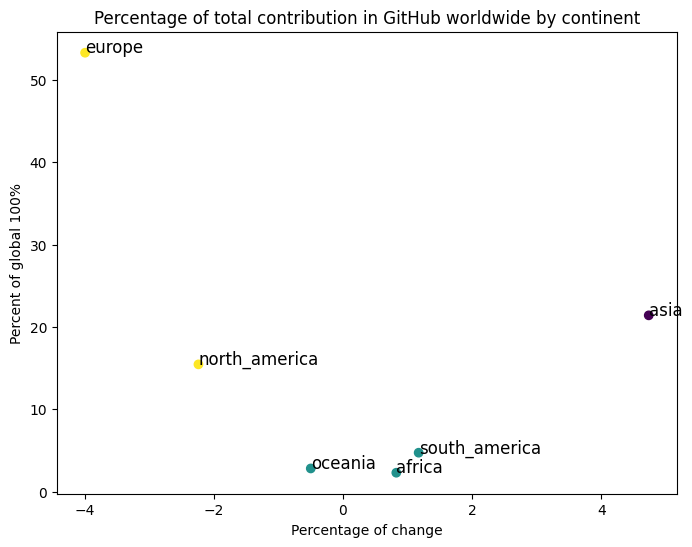

In [ ]:
copy_values = aggregated_weights

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']], clusters=3,
            country_codes_data=copy_values['source_region'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Percentage of total contribution in GitHub worldwide by continent",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

## Consumption

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


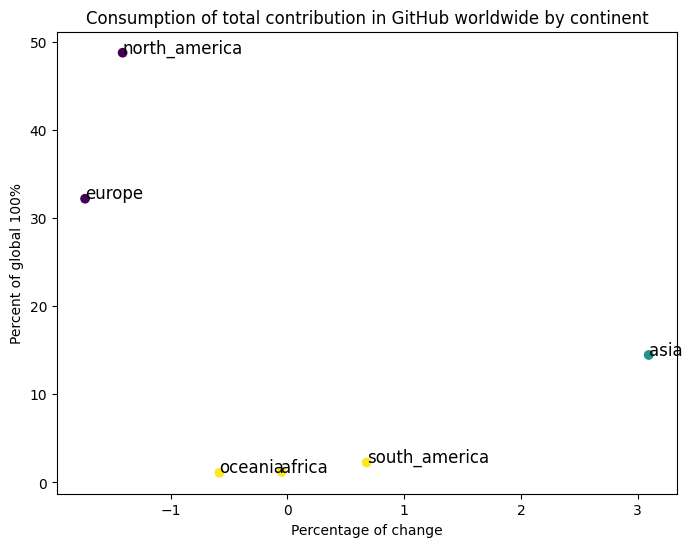

In [ ]:
copy_values = destination_aggregated_weights

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']], clusters=3,
            country_codes_data=copy_values['destination_region'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Consumption of total contribution in GitHub worldwide by continent",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

# Economics: Per ecomomic part of world

In [ ]:
east_asia = [
 "CN", "IN","ID","JP","KR","VN","TH","PH","HK","BD","PK","TW","SG","MY","LK","NP","MM","KH","PS","MN","LA","AF","MO","BN","MV","BT"
]

central_asia = [
"KZ","KG","TJ","TM","UZ"
]

rest_of_africa = [
 "EG","NG","MA","ZA","DZ","TN","KE","GH","CI","UG","CM","TZ","ET","SN","SD","AO","LY","ZW","RW","MG","BJ","MU","CD","MZ","ZM","SO","TG","RE","BW","BF","ML","MW","GN","SL","MR","LR","NA","GA","CV","CG","BI","GM","NE","LS","DJ","SC","SZ"
]

middle_east = [
"AM","AZ","BH","GE","IR","IQ","IL","JO","KW","LB","OM","QA","SA","SY","TR","AE","YE"
]

rest_of_europe = [
"RU","UA","BY","RS","AL","MD","BA","IS","MK","ME","JE","IM","AD","XK","FO","MC"
]

developed_europe = [
 "GB","DE","FR","ES","NL","PL","IT","SE","CH","BE","NO","CZ","DK","PT","RO","AT","BG","FI","HU","IE","GR","SK","LT","HR","EE","LV","SI","LU","CY","MT",
]


In [ ]:
def choose_region(row, target_direction):
    if row[target_direction] in north_america:
        return "north_america"
    if row[target_direction] in south_america:
        return "south_america"
    if row[target_direction] in oceania:
        return "oceania"
    if row[target_direction] in east_asia:
        return "east_asia"
    if row[target_direction] in central_asia:
        return "central_asia"
    if row[target_direction] in rest_of_africa:
        return "rest_of_africa"
    if row[target_direction] in middle_east:
        return "middle_east"
    if row[target_direction] in rest_of_europe:
        return "rest_of_europe"
    if row[target_direction] in developed_europe:
        return "developed_europe"
    else:
        return "unknown"

    return "unknown"

def choose_region_for_source(row):
  return choose_region(row, "source")


def choose_region_for_destination(row):
  return choose_region(row, "destination")

economies["source_region"] = economies.apply(choose_region_for_source, axis=1)
economies = economies[economies["source_region"] != "unknown"]
aggregated_weights = get_aggregated_values(
    filtered_data=economies,
    country_column="source_region",
    weight_column="weight"
)

economies["destination_region"] = economies.apply(choose_region_for_destination, axis=1)
economies = economies[economies["destination_region"] != "unknown"]
destination_aggregated_weights = get_aggregated_values(
    filtered_data=economies,
    country_column="destination_region",
    weight_column="weight"
)

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]


Total values changed from 4515436 in 2020 to 8812664 in 2023 = 95.16750984843988%
    
Total values changed from 4515311 in 2020 to 8812279 in 2023 = 95.16438624050481%
    


<ipython-input-16-9ada517026d3>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economies["destination_region"] = economies.apply(choose_region_for_destination, axis=1)
<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]


## Production

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


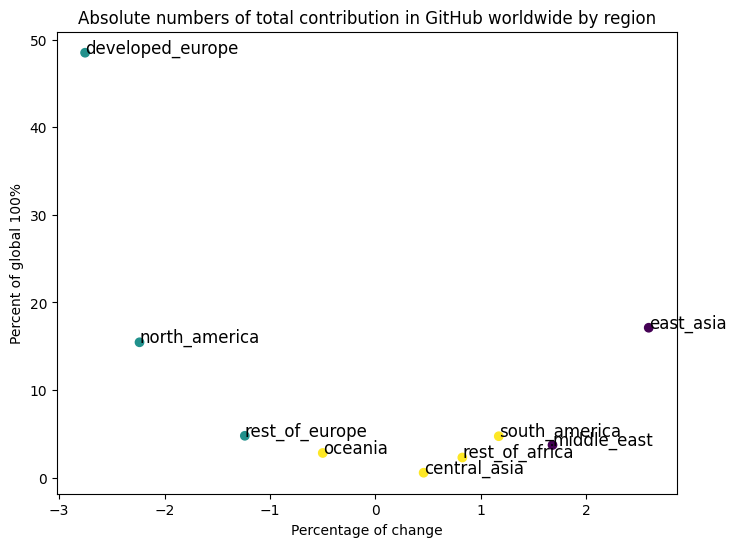

In [ ]:
# Absolute numbers
copy_values = aggregated_weights

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']], clusters=3,
            country_codes_data=copy_values['source_region'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute numbers of total contribution in GitHub worldwide by region",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


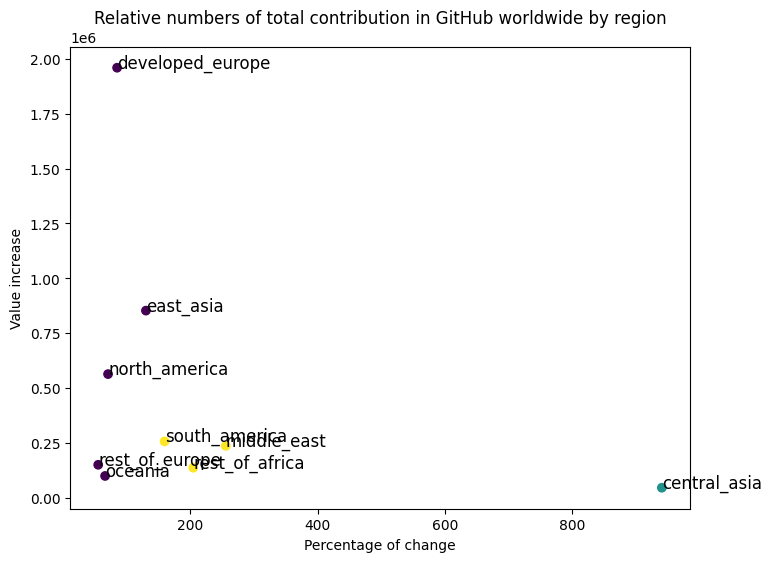

In [ ]:
# Relative numbers
copy_values = aggregated_weights

plot_kmeans(kmeans_data=copy_values[['diff_percent']], clusters=3,
            country_codes_data=copy_values['source_region'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative numbers of total contribution in GitHub worldwide by region",
            x_label="Percentage of change",
            y_label="Value increase")

## Consumption

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


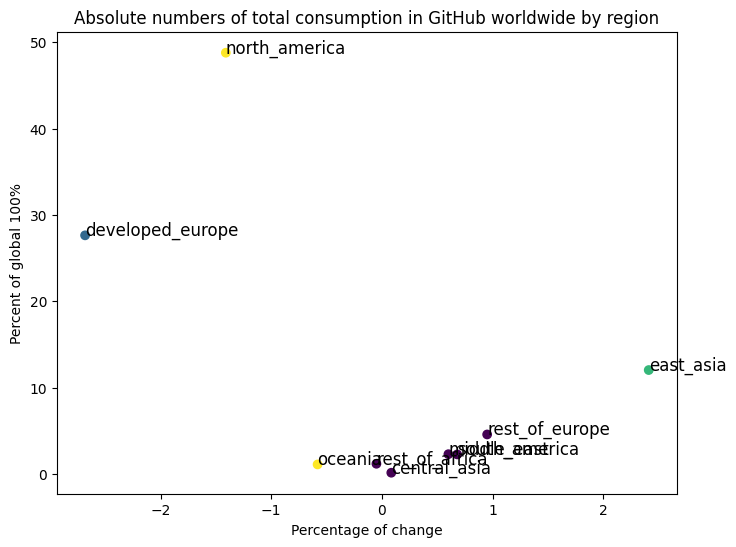

In [ ]:
# Absolute numbers
copy_values = destination_aggregated_weights

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['destination_region'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute numbers of total consumption in GitHub worldwide by region",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


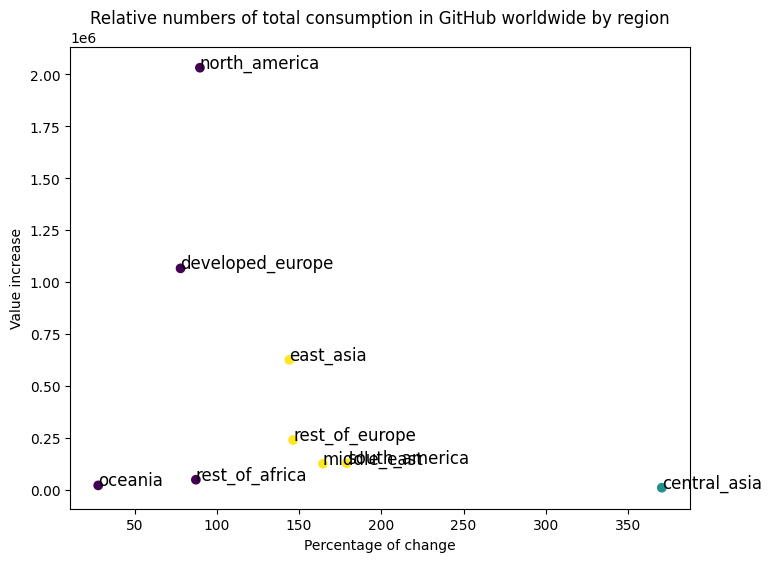

In [ ]:
# Relative numbers
copy_values = destination_aggregated_weights

plot_kmeans(kmeans_data=copy_values[['diff_percent']], clusters=3,
            country_codes_data=copy_values['destination_region'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative numbers of total consumption in GitHub worldwide by region",
            x_label="Percentage of change",
            y_label="Value increase")

# Economics: Central Asia

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 4774 in 2020 to 49684 in 2023 = 940.7205697528278%
    


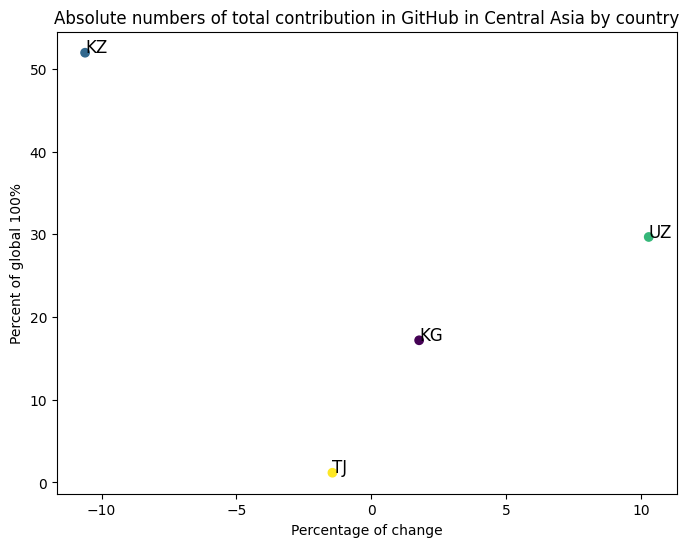

In [ ]:
# Production (absolute numbers)
data = economies[economies.source.isin(central_asia)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="source",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['source'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute numbers of total contribution in GitHub in Central Asia by country",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 4774 in 2020 to 49684 in 2023 = 940.7205697528278%
    


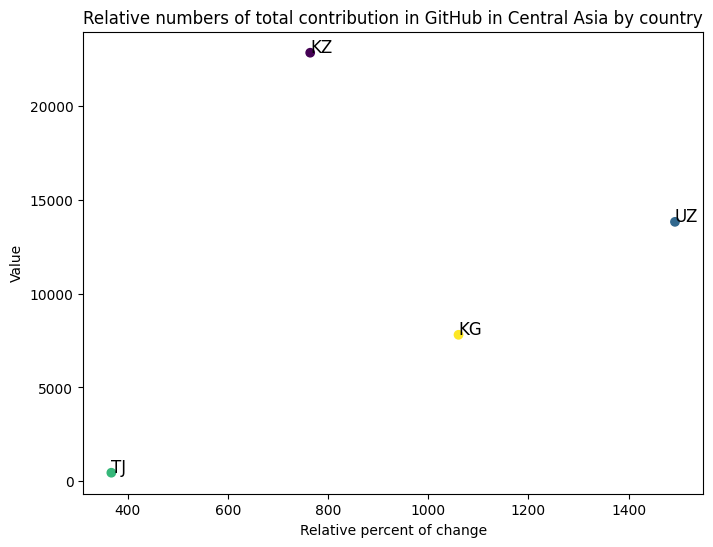

In [ ]:
# Production (relative numbers)
data = economies[economies.source.isin(central_asia)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="source",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['source'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative numbers of total contribution in GitHub in Central Asia by country",
            x_label="Relative percent of change",
            y_label="Value")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 2694 in 2020 to 12677 in 2023 = 370.56421677802524%
    


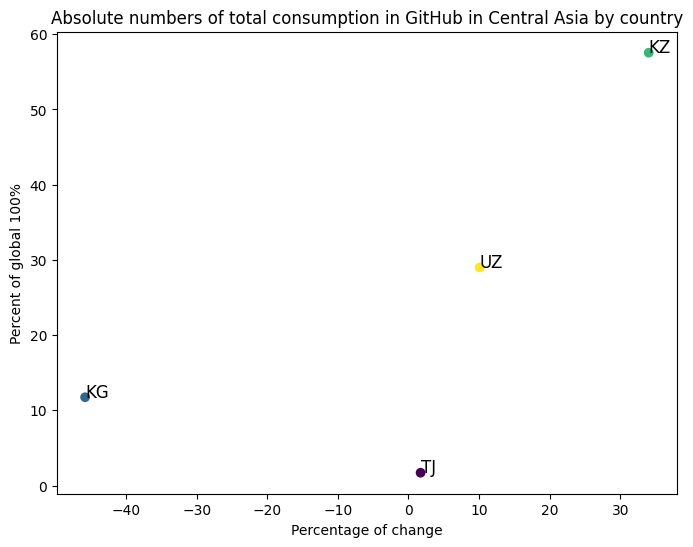

In [ ]:
# Consumption (absolute numbers)
data = economies[economies.destination.isin(central_asia)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="destination",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['destination'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute numbers of total consumption in GitHub in Central Asia by country",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 2694 in 2020 to 12677 in 2023 = 370.56421677802524%
    


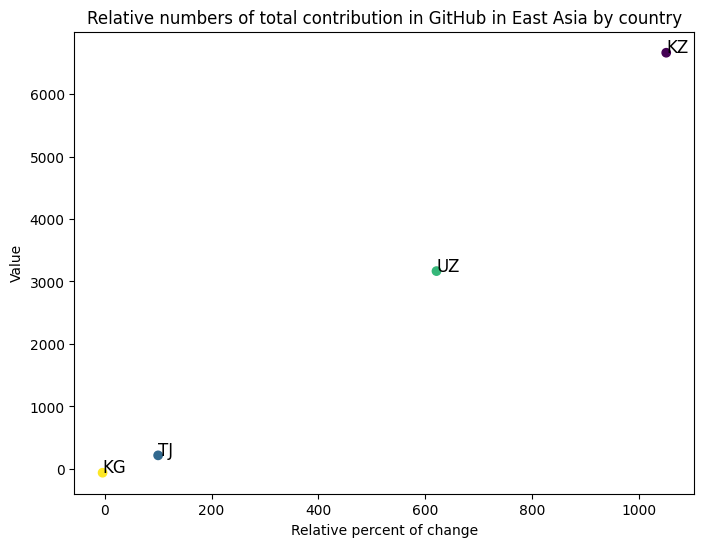

In [ ]:
# Consumption (relative numbers)
data = economies[economies.destination.isin(central_asia)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="destination",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['destination'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative numbers of total contribution in GitHub in East Asia by country",
            x_label="Relative percent of change",
            y_label="Value")

# Economics: East Asia

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 655723 in 2020 to 1508331 in 2023 = 130.02563582488338%
    


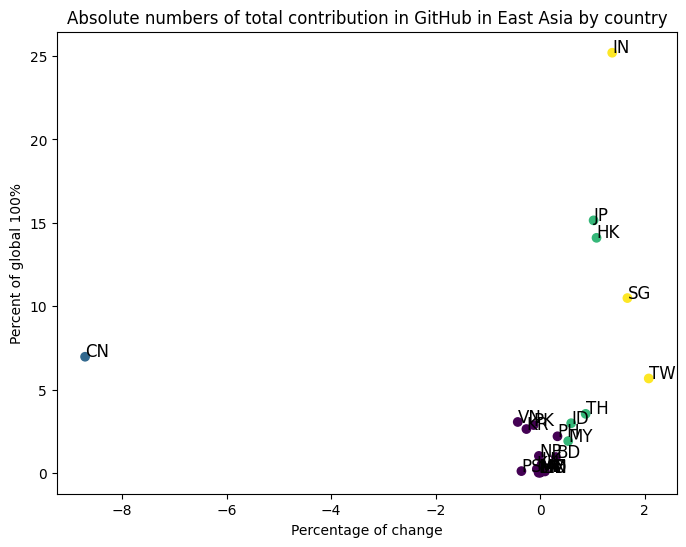

In [ ]:
# Production (absolute numbers)
data = economies[economies.source.isin(east_asia)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="source",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['source'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute numbers of total contribution in GitHub in East Asia by country",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 655723 in 2020 to 1508331 in 2023 = 130.02563582488338%
    


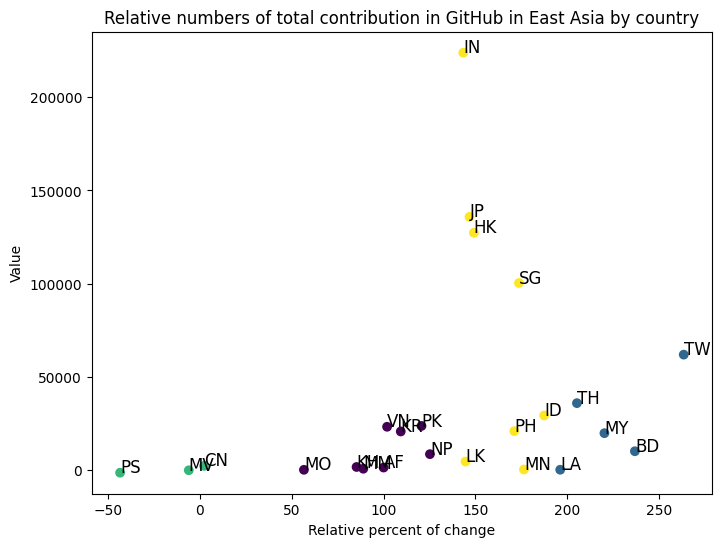

In [ ]:
# Production (relative numbers)
data = economies[economies.source.isin(east_asia)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="source",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['source'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative numbers of total contribution in GitHub in East Asia by country",
            x_label="Relative percent of change",
            y_label="Value")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 434545 in 2020 to 1060407 in 2023 = 144.02697073950915%
    


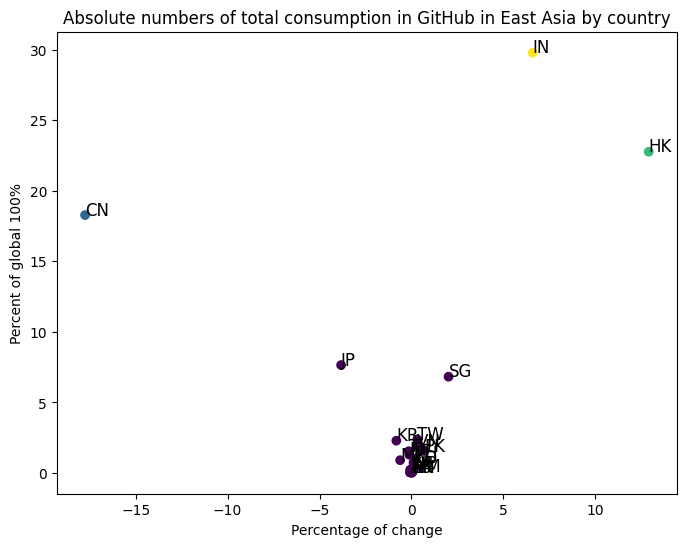

In [ ]:
# Consumption (absolute numbers)
data = economies[economies.destination.isin(east_asia)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="destination",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['destination'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute numbers of total consumption in GitHub in East Asia by country",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 434545 in 2020 to 1060407 in 2023 = 144.02697073950915%
    


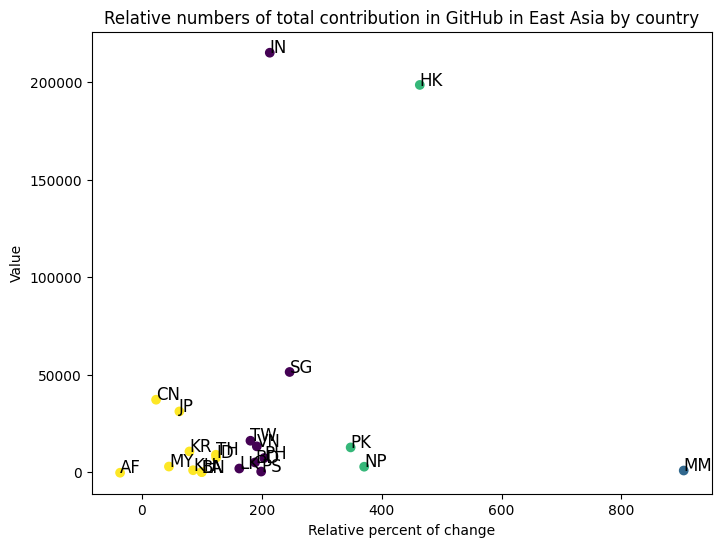

In [ ]:
# Consumption (relative numbers)
data = economies[economies.destination.isin(east_asia)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="destination",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['destination'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative numbers of total contribution in GitHub in East Asia by country",
            x_label="Relative percent of change",
            y_label="Value")

# Economics: Afrika

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 66612 in 2020 to 202485 in 2023 = 203.97676094397409%
    


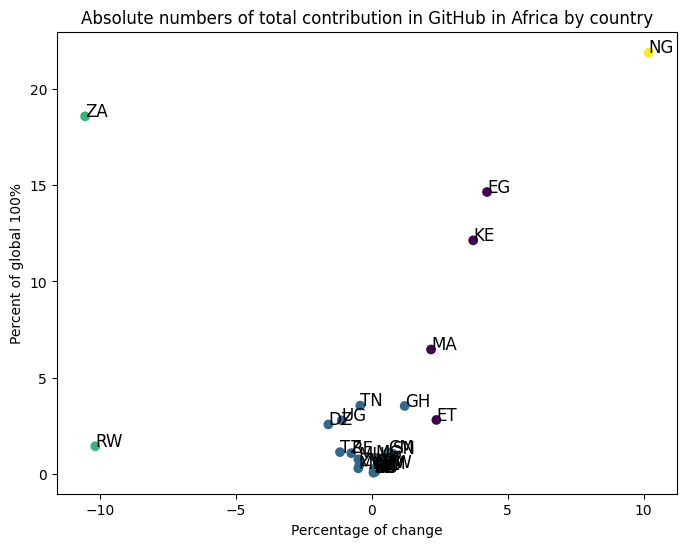

In [ ]:
# Production (absolute numbers)
data = economies[economies.source.isin(rest_of_africa)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="source",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['source'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute numbers of total contribution in GitHub in Africa by country",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 66612 in 2020 to 202485 in 2023 = 203.97676094397409%
    


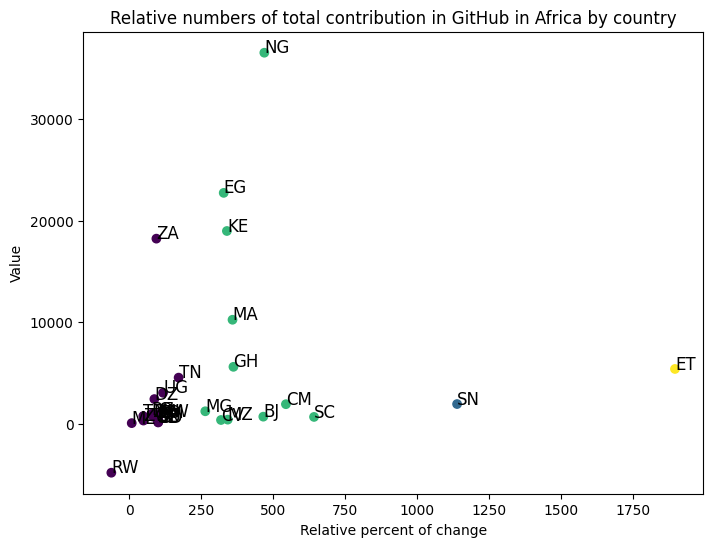

In [ ]:
# Production (relative numbers)
data = economies[economies.source.isin(rest_of_africa)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="source",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['source'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative numbers of total contribution in GitHub in Africa by country",
            x_label="Relative percent of change",
            y_label="Value")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 55604 in 2020 to 104104 in 2023 = 87.22394072368894%
    


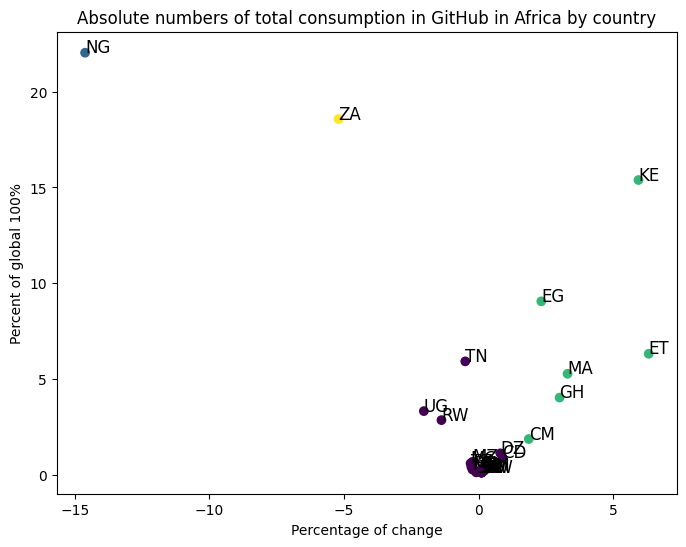

In [ ]:
# Consumption (absolute numbers)
data = economies[economies.destination.isin(rest_of_africa)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="destination",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['destination'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute numbers of total consumption in GitHub in Africa by country",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 55604 in 2020 to 104104 in 2023 = 87.22394072368894%
    


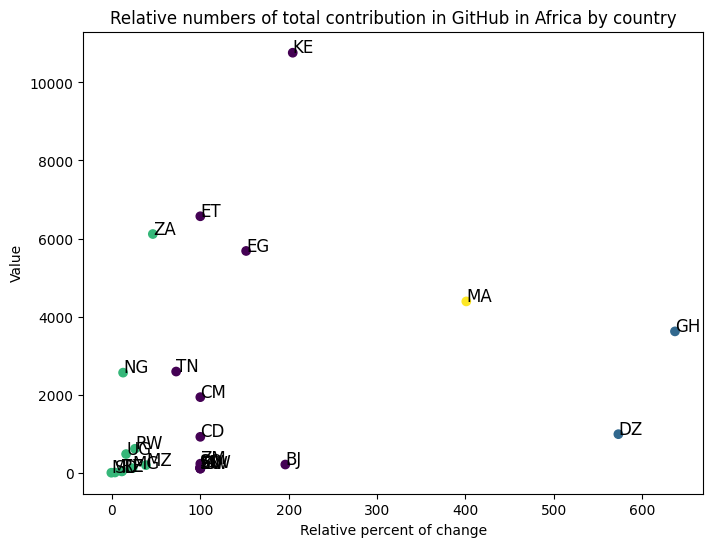

In [ ]:
# Consumption (relative numbers)
data = economies[economies.destination.isin(rest_of_africa)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="destination",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['destination'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative numbers of total contribution in GitHub in Africa by country",
            x_label="Relative percent of change",
            y_label="Value")

# Middle east

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 92399 in 2020 to 328459 in 2023 = 255.47895539995022%
    


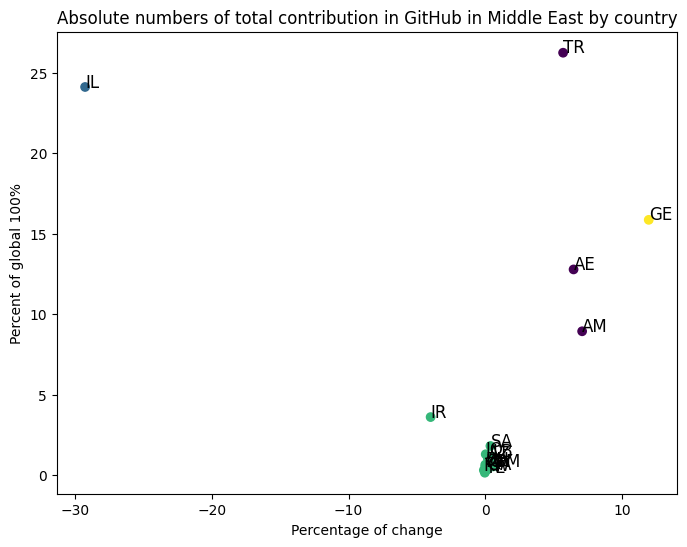

In [ ]:
# Production (absolute numbers)
data = economies[economies.source.isin(middle_east)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="source",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['source'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute numbers of total contribution in GitHub in Middle East by country",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 92399 in 2020 to 328459 in 2023 = 255.47895539995022%
    


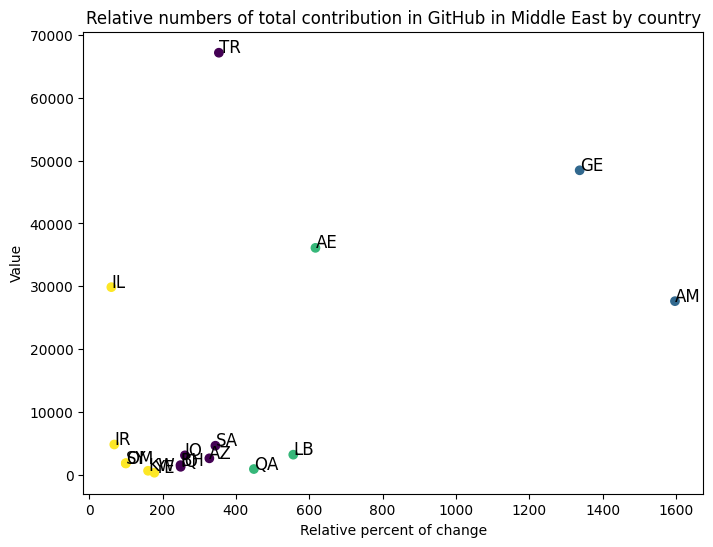

In [ ]:
# Production (relative numbers)
data = economies[economies.source.isin(middle_east)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="source",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['source'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative numbers of total contribution in GitHub in Middle East by country",
            x_label="Relative percent of change",
            y_label="Value")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 76323 in 2020 to 201832 in 2023 = 164.4445317925134%
    


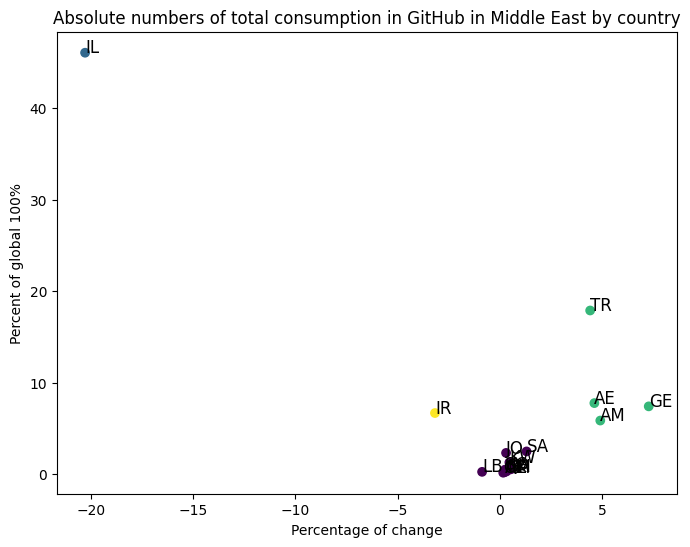

In [ ]:
# Consumption (absolute numbers)
data = economies[economies.destination.isin(middle_east)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="destination",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['destination'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute numbers of total consumption in GitHub in Middle East by country",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 76323 in 2020 to 201832 in 2023 = 164.4445317925134%
    


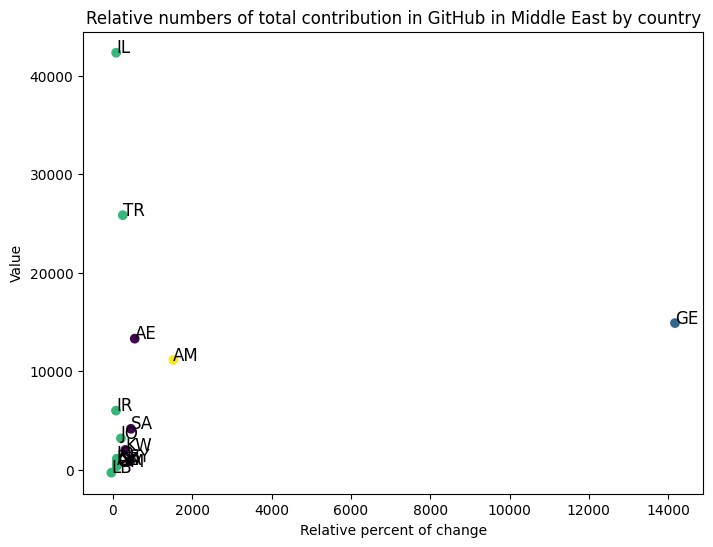

In [ ]:
# Consumption (relative numbers)
data = economies[economies.destination.isin(middle_east)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="destination",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['destination'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative numbers of total contribution in GitHub in Middle East by country",
            x_label="Relative percent of change",
            y_label="Value")

# Economics: Developing Europe

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 271763 in 2020 to 421261 in 2023 = 55.01043188366334%
    


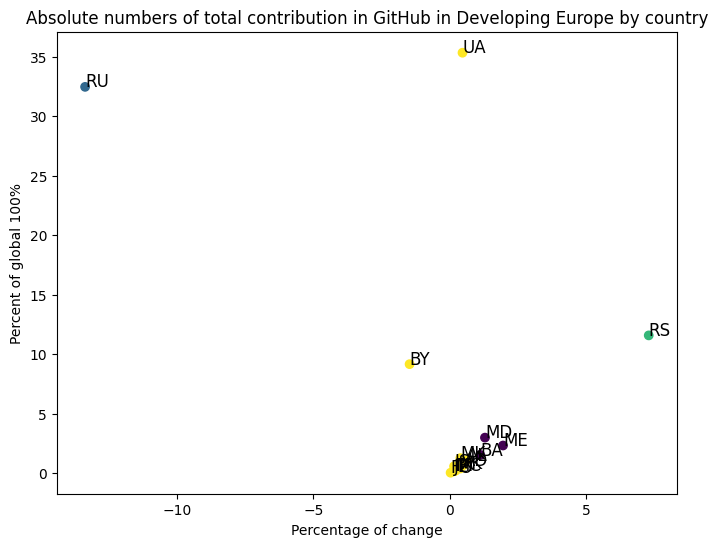

In [ ]:
# Production (absolute numbers)
data = economies[economies.source.isin(rest_of_europe)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="source",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['source'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute numbers of total contribution in GitHub in Developing Europe by country",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 271763 in 2020 to 421261 in 2023 = 55.01043188366334%
    


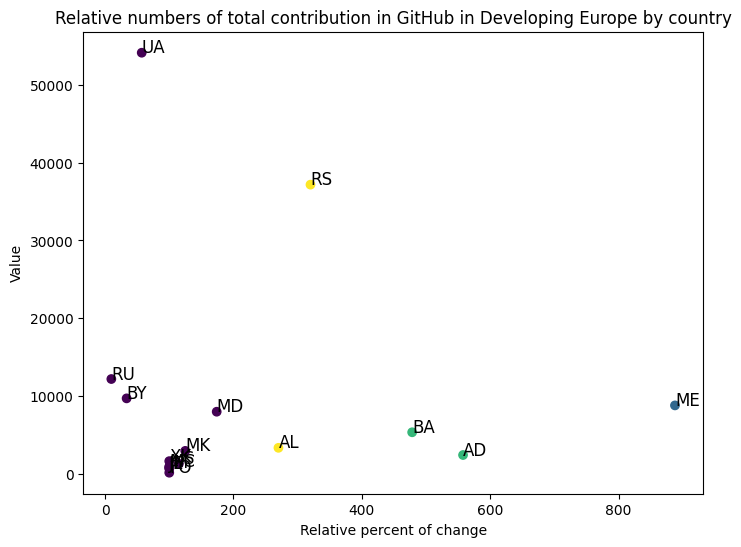

In [ ]:
# Production (relative numbers)
data = economies[economies.source.isin(rest_of_europe)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="source",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['source'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative numbers of total contribution in GitHub in Developing Europe by country",
            x_label="Relative percent of change",
            y_label="Value")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 163677 in 2020 to 403161 in 2023 = 146.31499844205356%
    


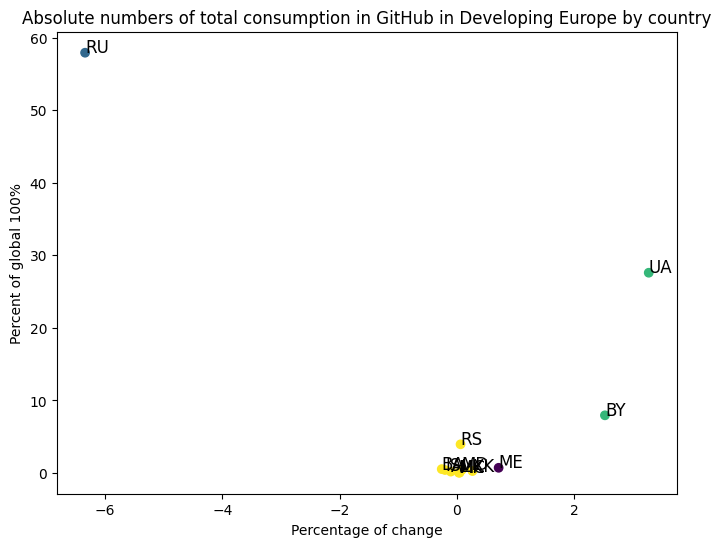

In [ ]:
# Consumption (absolute numbers)
data = economies[economies.destination.isin(rest_of_europe)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="destination",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['destination'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute numbers of total consumption in GitHub in Developing Europe by country",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 163677 in 2020 to 403161 in 2023 = 146.31499844205356%
    


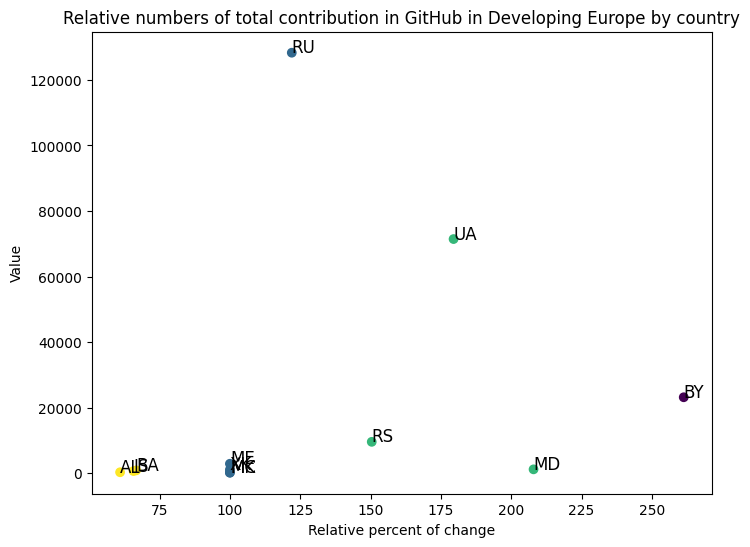

In [ ]:
# Consumption (relative numbers)
data = economies[economies.destination.isin(rest_of_europe)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="destination",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['destination'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative numbers of total contribution in GitHub in Developing Europe by country",
            x_label="Relative percent of change",
            y_label="Value")

# Developed Europe

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 2314623 in 2020 to 4274937 in 2023 = 84.69258276617833%
    


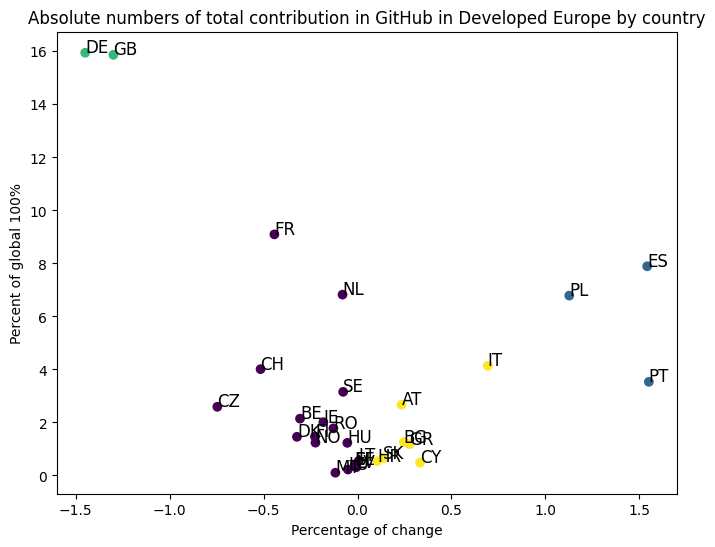

In [ ]:
# Production (absolute numbers)
data = economies[economies.source.isin(developed_europe)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="source",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['source'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute numbers of total contribution in GitHub in Developed Europe by country",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 2314623 in 2020 to 4274937 in 2023 = 84.69258276617833%
    


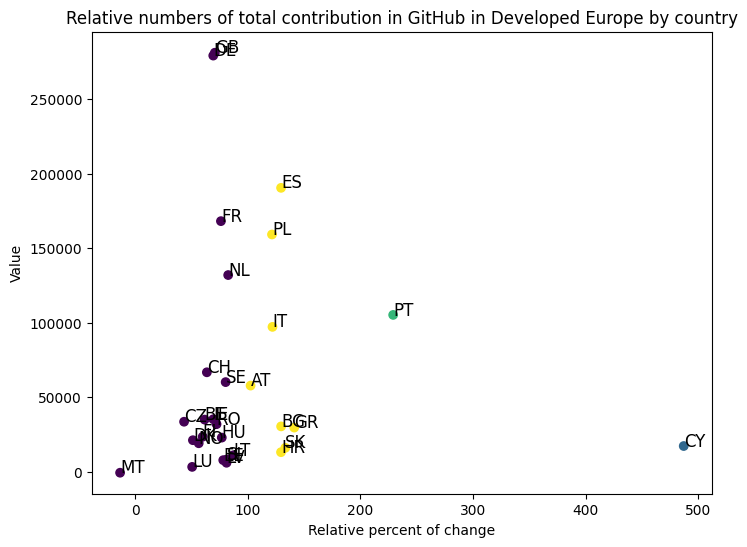

In [ ]:
# Production (relative numbers)
data = economies[economies.source.isin(developed_europe)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="source",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['source'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative numbers of total contribution in GitHub in Developed Europe by country",
            x_label="Relative percent of change",
            y_label="Value")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 1368750 in 2020 to 2435007 in 2023 = 77.90005479452054%
    


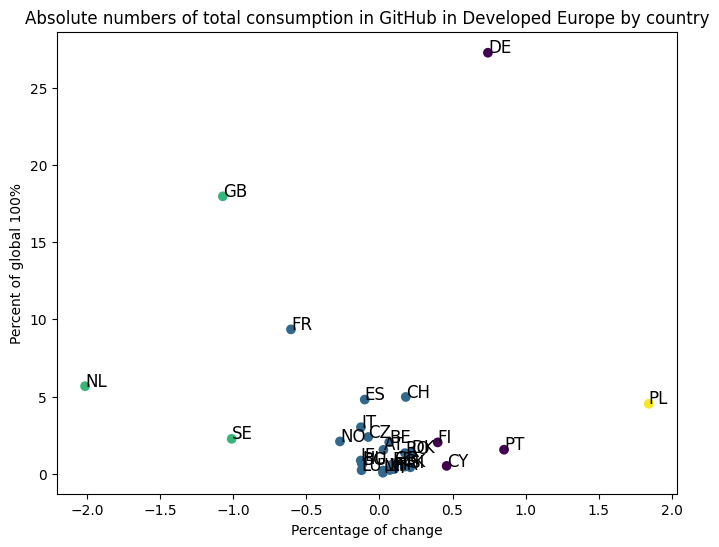

In [ ]:
# Consumption (absolute numbers)
data = economies[economies.destination.isin(developed_europe)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="destination",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['destination'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute numbers of total consumption in GitHub in Developed Europe by country",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 1368750 in 2020 to 2435007 in 2023 = 77.90005479452054%
    


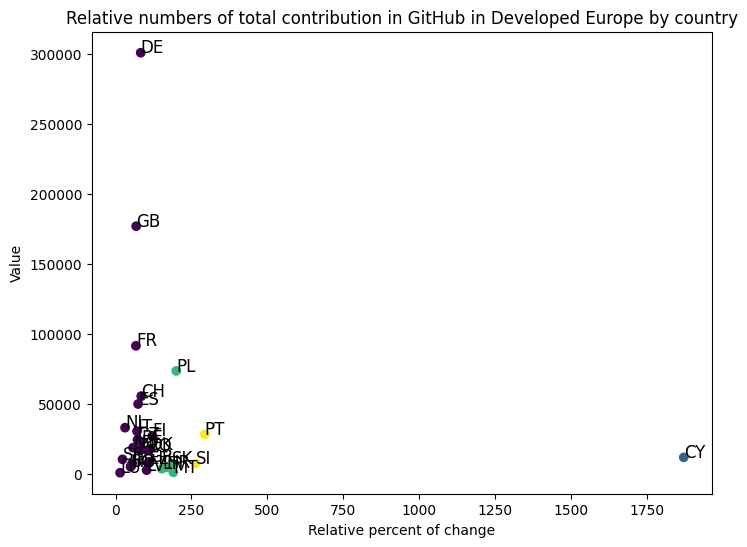

In [ ]:
# Consumption (relative numbers)
data = economies[economies.destination.isin(developed_europe)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="destination",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['destination'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative numbers of total contribution in GitHub in Developed Europe by country",
            x_label="Relative percent of change",
            y_label="Value")

# Economics: North America

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 798855 in 2020 to 1361780 in 2023 = 70.46648014971429%
    


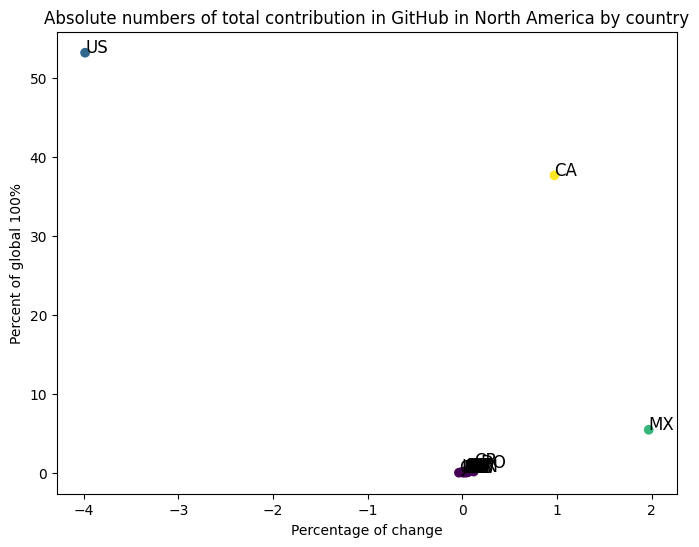

In [ ]:
# Production (absolute numbers)
data = economies[economies.source.isin(north_america)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="source",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['source'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute numbers of total contribution in GitHub in North America by country",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 798855 in 2020 to 1361780 in 2023 = 70.46648014971429%
    


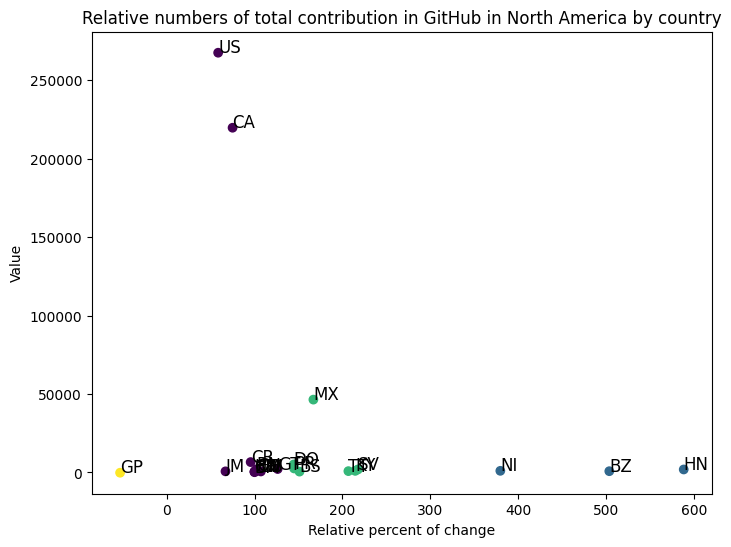

In [ ]:
# Production (relative numbers)
data = economies[economies.source.isin(north_america)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="source",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['source'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative numbers of total contribution in GitHub in North America by country",
            x_label="Relative percent of change",
            y_label="Value")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 2266122 in 2020 to 4298391 in 2023 = 89.68047616147763%
    


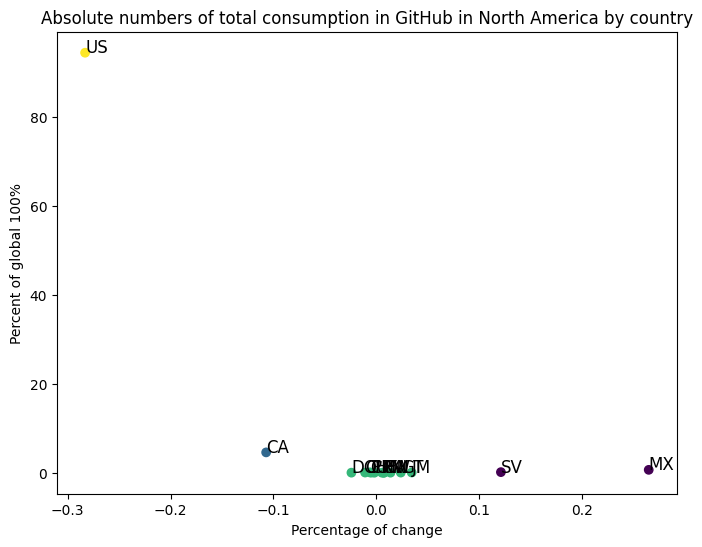

In [ ]:
# Consumption (absolute numbers)
data = economies[economies.destination.isin(north_america)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="destination",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['destination'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute numbers of total consumption in GitHub in North America by country",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 2266122 in 2020 to 4298391 in 2023 = 89.68047616147763%
    


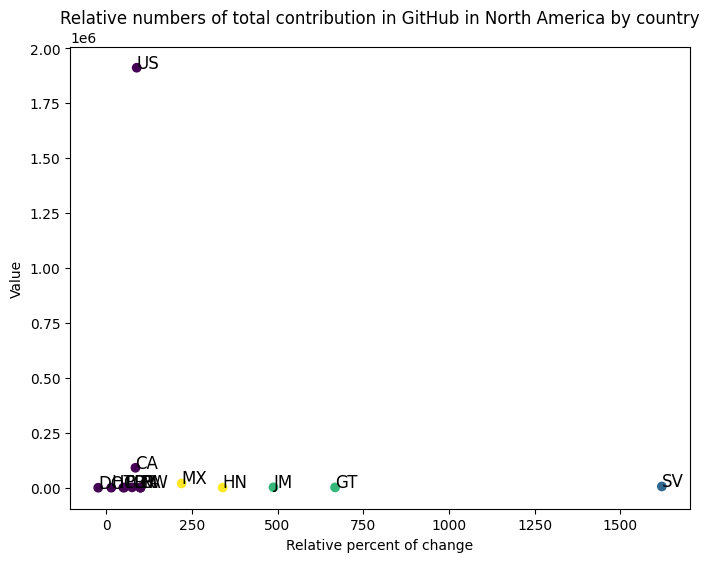

In [ ]:
# Consumption (relative numbers)
data = economies[economies.destination.isin(north_america)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="destination",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['destination'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative numbers of total contribution in GitHub in North America by country",
            x_label="Relative percent of change",
            y_label="Value")

# South America

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 160749 in 2020 to 416931 in 2023 = 159.3677099079932%
    


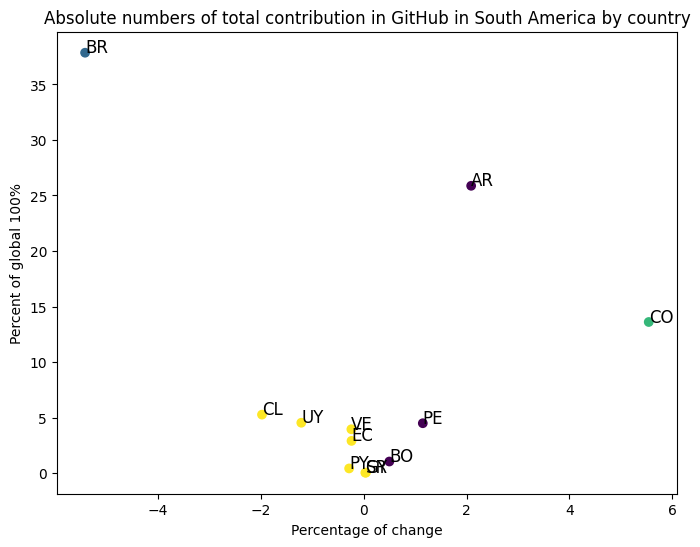

In [ ]:
# Production (absolute numbers)
data = economies[economies.source.isin(south_america)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="source",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['source'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute numbers of total contribution in GitHub in South America by country",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 160749 in 2020 to 416931 in 2023 = 159.3677099079932%
    


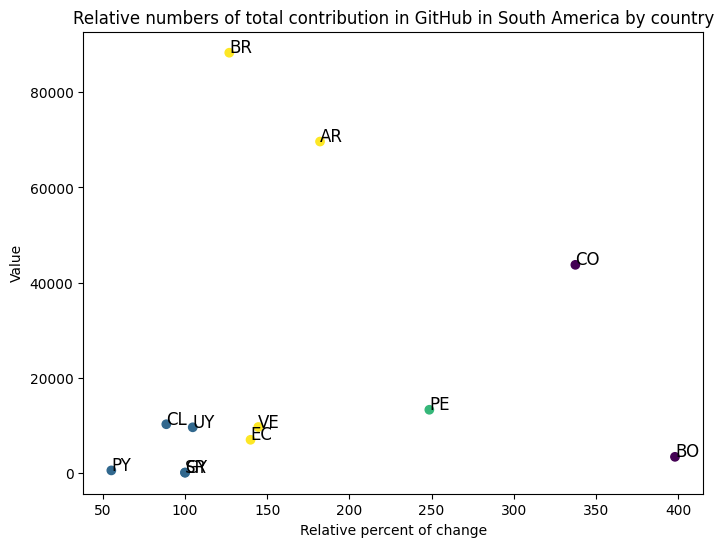

In [ ]:
# Production (relative numbers)
data = economies[economies.source.isin(south_america)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="source",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['source'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative numbers of total contribution in GitHub in South America by country",
            x_label="Relative percent of change",
            y_label="Value")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 71492 in 2020 to 199417 in 2023 = 178.9361047389918%
    


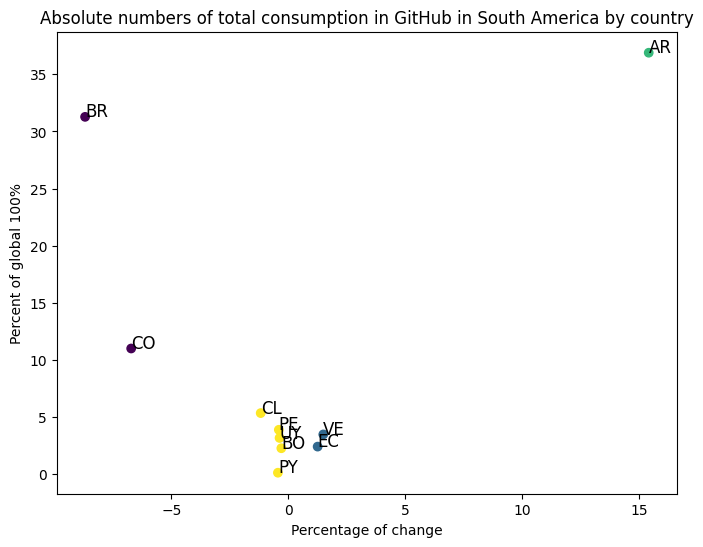

In [ ]:
# Consumption (absolute numbers)
data = economies[economies.destination.isin(south_america)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="destination",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['total_percent_diff']],
            country_codes_data=copy_values['destination'], x_data=copy_values['total_percent_diff'], y_data=copy_values['total_percent_2023'],
            title="Absolute numbers of total consumption in GitHub in South America by country",
            x_label="Percentage of change",
            y_label="Percent of global 100%")

<ipython-input-3-245fdff3721c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_weight = grouped_sources[grouped_sources.year != 2021][grouped_sources.year != 2022][grouped_sources.quarter == 1]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total values changed from 71492 in 2020 to 199417 in 2023 = 178.9361047389918%
    


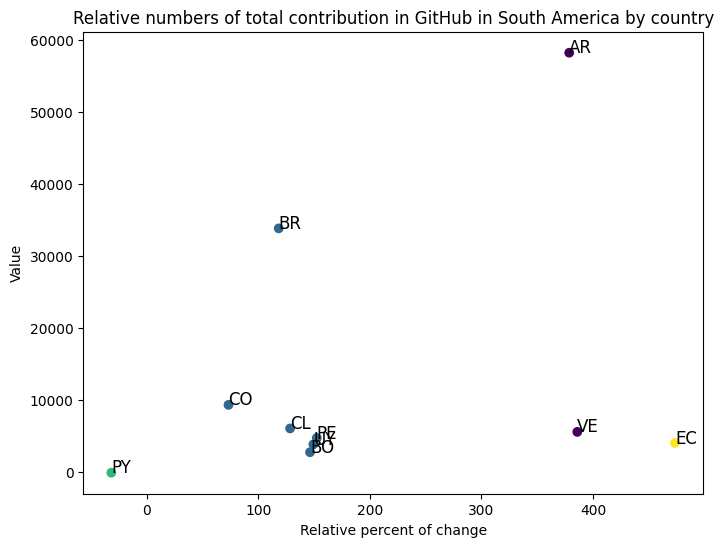

In [ ]:
# Consumption (relative numbers)
data = economies[economies.destination.isin(south_america)]
copy_values = get_aggregated_values(
    filtered_data=data,
    country_column="destination",
    weight_column="weight"
)

plot_kmeans(kmeans_data=copy_values[['diff_percent']],
            country_codes_data=copy_values['destination'], x_data=copy_values['diff_percent'], y_data=copy_values['diff_value'],
            title="Relative numbers of total contribution in GitHub in South America by country",
            x_label="Relative percent of change",
            y_label="Value")